In [1]:
import os
os.getcwd()

'/Users/Fidji/Documents/Études/Master ISF/M2 ISF/Machine Learning'

In [1]:
import pandas
import pandas
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_validate 
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error

df_london = pandas.read_csv('london_merged.csv')

In [2]:
##découverte des données
pandas.DataFrame(df_london)  

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0


In [3]:
#nb observations et de colonnes/variables
df_london.shape

(17414, 10)

In [4]:
#noms des colonnes/variables
df_london.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [5]:
#types de variables
df_london.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [6]:
#visualisation des 10eres obs
df_london.head(10)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0


In [7]:
#transformation la variable timestamp sous format "datetime" - auparavant format "object"
df_london['timestamp']=pandas.to_datetime(df_london['timestamp'])

In [8]:
#creation de variables jour de la semaine(0,6) et heure
df_london['weekofday']=df_london['timestamp'].dt.dayofweek
df_london['hour']=df_london['timestamp'].dt.hour
df_london['month']=df_london['timestamp'].dt.month
df_london['weekofdayN']=df_london['timestamp'].dt.weekday_name

In [9]:
#on vérifie que les variables sont bien binaires 
df_london['is_weekend'].value_counts()
df_london['is_holiday'].value_counts()

0.0    17030
1.0      384
Name: is_holiday, dtype: int64

In [10]:
#definition de variables catégorielles
df_london["weather_code"]=df_london["weather_code"].astype('int')
df_london["weather_code"]=df_london["weather_code"].astype('category')

df_london["season"]=df_london["season"].astype('int')
df_london["season"]=df_london["season"].astype('category')

df_london["weekofday"]=df_london["weekofday"].astype('category')
df_london["hour"]=df_london["hour"].astype('int')

df_london["is_holiday"]=df_london["is_holiday"].astype('int')
df_london["is_holiday"]=df_london["is_holiday"].astype('bool')

df_london["is_weekend"]=df_london["is_weekend"].astype('int')
df_london["is_weekend"]=df_london["is_weekend"].astype('bool')

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text xticklabel objects>)

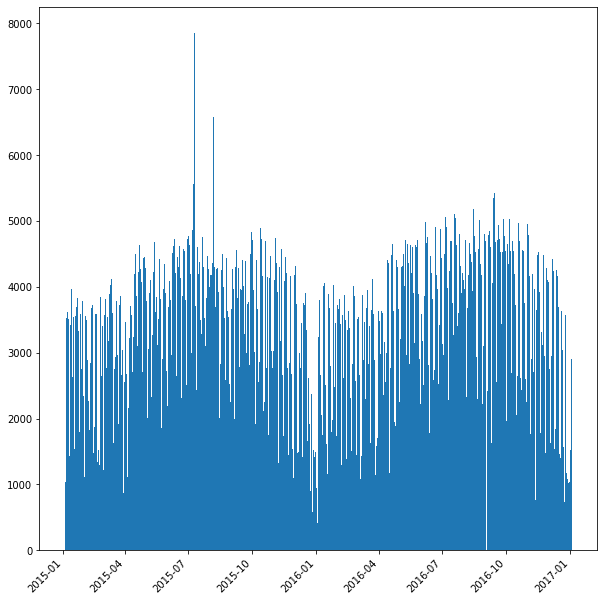

In [11]:
# evolution du nb de location sur la periode
pandas.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt

plt.figure(1,figsize = (10, 10))
plt.bar(df_london["timestamp"],df_london["cnt"])
plt.xticks(rotation=45,horizontalalignment="right")

<BarContainer object of 3590 artists>

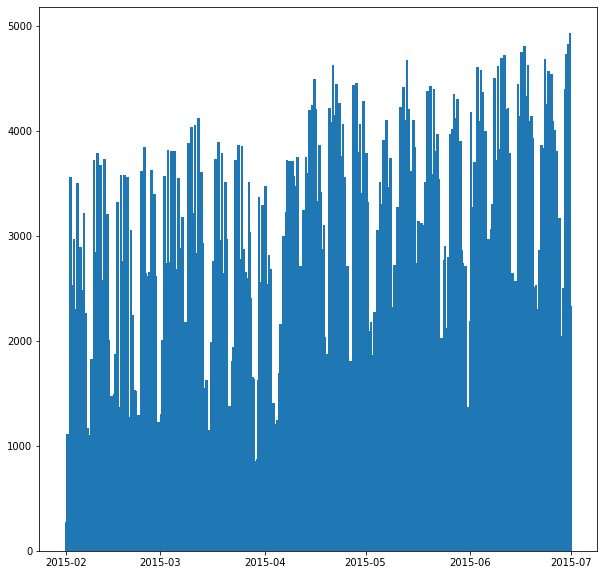

In [18]:
#representation des 6 premiers mois de l'annee 2015
plt.figure(1,figsize = (10, 10))
plt.bar(df_london[(df_london['timestamp'].dt.year==2015)&
                   ((df_london['timestamp'].dt.month<7)&(df_london['timestamp'].dt.month>1))]["timestamp"],
         df_london[(df_london['timestamp'].dt.year==2015)&
                   ((df_london['timestamp'].dt.month<7)&(df_london['timestamp'].dt.month>1))]["cnt"])

In [14]:
# valeurs extremes - max
df_london.loc[df_london['cnt']>5500]

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,weekofday,hour,month,weekofdayN
4446,2015-07-08 17:00:00,5560,20.0,20.0,53.0,30.0,2,False,False,1,2,17,7,Wednesday
4461,2015-07-09 08:00:00,7531,14.5,14.5,61.0,19.0,2,False,False,1,3,8,7,Thursday
4469,2015-07-09 16:00:00,6033,23.0,22.0,26.0,11.0,1,False,False,1,3,16,7,Thursday
4470,2015-07-09 17:00:00,7860,23.0,22.0,27.0,11.0,1,False,False,1,3,17,7,Thursday
4471,2015-07-09 18:00:00,6913,22.5,21.5,29.0,13.0,1,False,False,1,3,18,7,Thursday
5129,2015-08-06 08:00:00,6585,19.0,19.0,78.0,12.0,7,False,False,1,3,8,8,Thursday
5138,2015-08-06 17:00:00,7208,22.5,22.5,55.0,17.5,2,False,False,1,3,17,8,Thursday
5139,2015-08-06 18:00:00,6394,21.5,21.5,58.5,20.0,2,False,False,1,3,18,8,Thursday


In [15]:
# nombre d'observations avec fort cnt par mois
df_london['month'].loc[df_london['cnt']>5000].value_counts()

7     12
9     10
8      9
10     3
5      1
Name: month, dtype: int64

In [16]:
# valeurs extremes - min
df_london.loc[df_london['cnt']<50]

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,weekofday,hour,month,weekofdayN
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,False,True,3,6,4,1,Sunday
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1,False,True,3,6,5,1,Sunday
26,2015-01-05 02:00:00,32,5.0,4.0,87.0,6.0,4,False,False,3,0,2,1,Monday
27,2015-01-05 03:00:00,22,6.0,4.5,84.0,7.5,4,False,False,3,0,3,1,Monday
28,2015-01-05 04:00:00,38,6.5,5.0,84.0,8.0,4,False,False,3,0,4,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17371,2017-01-02 05:00:00,35,3.0,2.5,93.0,5.0,2,True,False,3,0,5,1,Monday
17391,2017-01-03 01:00:00,49,1.0,-2.0,87.0,10.0,1,False,False,3,1,1,1,Tuesday
17392,2017-01-03 02:00:00,43,0.5,-3.0,90.0,11.0,1,False,False,3,1,2,1,Tuesday
17393,2017-01-03 03:00:00,10,0.0,-4.0,93.0,13.0,1,False,False,3,1,3,1,Tuesday


In [17]:
# nombre d'observations avec faible cnt par mois
df_london['month'].loc[df_london['cnt']<30].value_counts()

3     37
1     36
2     35
11    29
4     13
12    10
5      7
6      4
10     2
9      2
Name: month, dtype: int64

In [18]:
#ces valeurs étant extremes et rares - nous ne pourrons les estimer - nous pourrions les supprimer
df_london.loc[df_london['cnt']<10]

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,weekofday,hour,month,weekofdayN
2015,2015-03-29 01:00:00,0,10.5,8.5,77.0,33.0,7,False,True,0,6,1,3,Sunday
16361,2016-11-21 03:00:00,9,6.0,3.5,93.0,12.0,7,False,False,2,0,3,11,Monday


In [19]:
# Nombre total d'utilisations par mois

df_london.groupby(['month'])['cnt'].agg('sum')

month
1     1166837
2     1136504
3     1352461
4     1600427
5     1897348
6     1967130
7     2286214
8     2171265
9     1891097
10    1800752
11    1381191
12    1254746
Name: cnt, dtype: int64

In [20]:
# Nombre moyen d'utilisations par mois

df_london.groupby(['month'])['cnt'].agg('mean')


month
1      784.691997
2      836.279617
3      921.294959
4     1112.953408
5     1275.099462
6     1383.354430
7     1543.696151
8     1463.116577
9     1356.597561
10    1217.546991
11     965.867832
12     845.516173
Name: cnt, dtype: float64

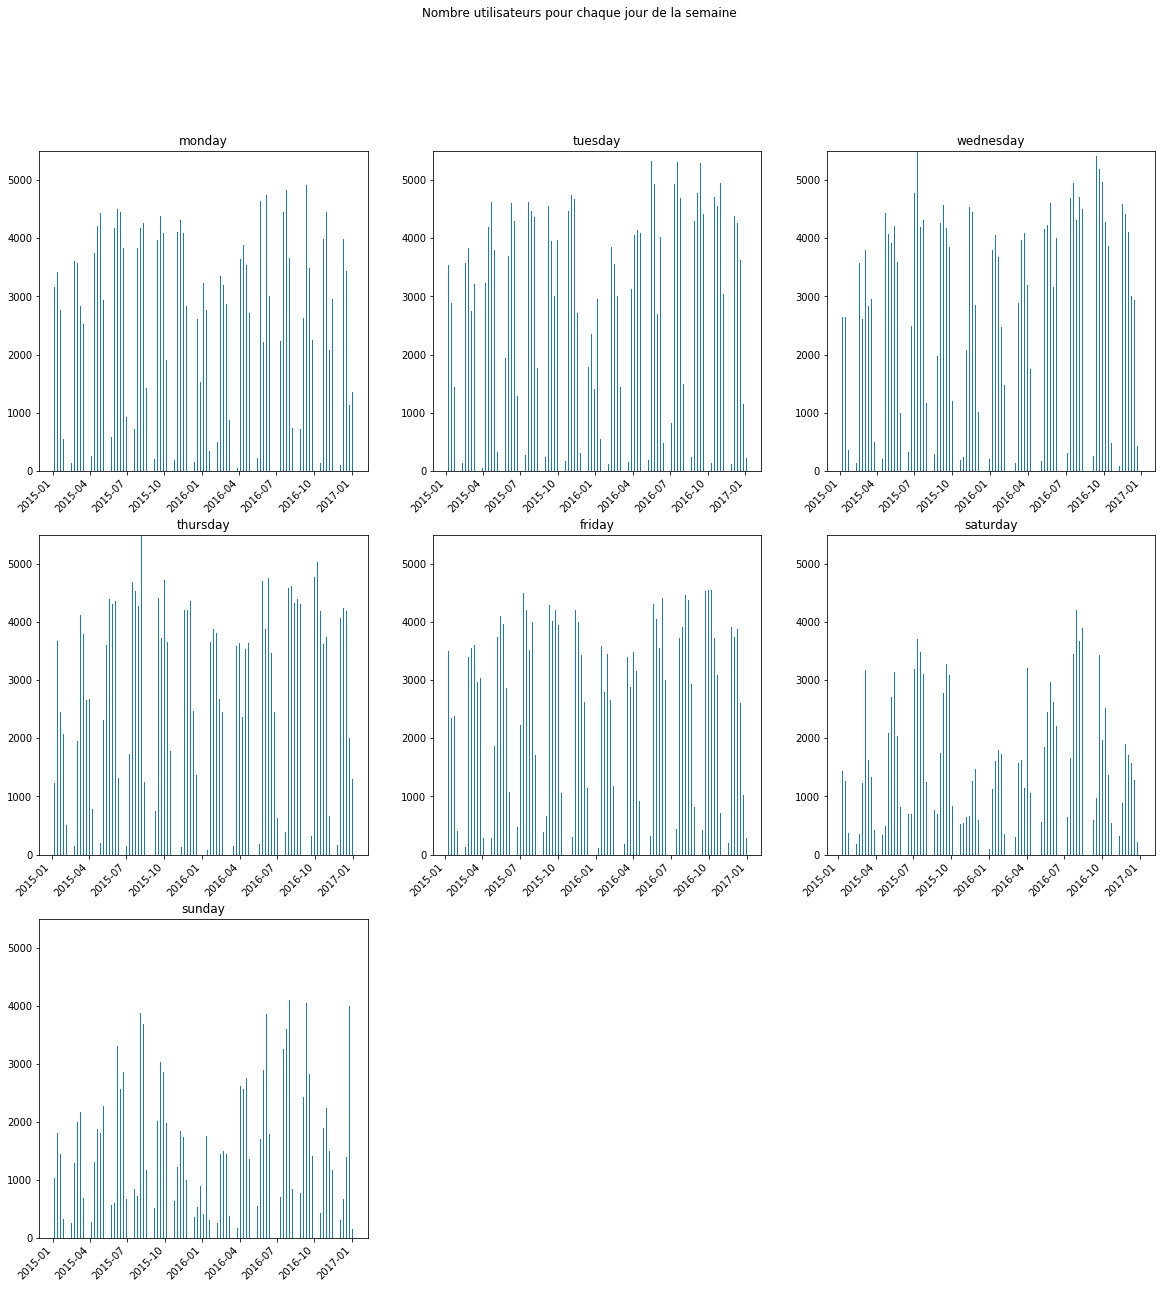

In [21]:
## JOURS DE LA SEMAINE

#nb de prise en charge pour chaque jour de la semaine 

#pb: n'affiche pas toutes les observations - simplement pour se faire une idee

day=['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

plt.figure(1,figsize = (20, 20))
plt.suptitle('Nombre utilisateurs pour chaque jour de la semaine')

for i in range(0,7):
    plt.subplot(3,3,i+1, title=day[i])
    plt.xticks(rotation=45,horizontalalignment="right")
    plt.ylim(ymax=5500)
    plt.bar(df_london[(df_london['weekofday'] == i)]['timestamp'],df_london[(df_london['weekofday'] == i)]['cnt'])

#observe une saisonalité: moins le samedi et dimanche, moins en hiver
## pris en compte par variable isweekend - binaire

In [22]:
# Nombre total d'utilisations par jour
   
df_london.groupby(['weekofdayN'])['cnt'].agg('sum')

weekofdayN
Friday       2897793
Monday       2834719
Saturday     2454040
Sunday       2403716
Thursday     3136956
Tuesday      3081414
Wednesday    3097334
Name: cnt, dtype: int64

In [23]:
# Nombre moyen d'utilisations selon le jour de la semaine

df_london.groupby(['weekofdayN'])['cnt'].agg('mean')

weekofdayN
Friday       1182.772653
Monday       1130.270734
Saturday      995.553753
Sunday        959.567265
Thursday     1258.810594
Tuesday      1230.105389
Wednesday    1244.409000
Name: cnt, dtype: float64

/Users/Fidji/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


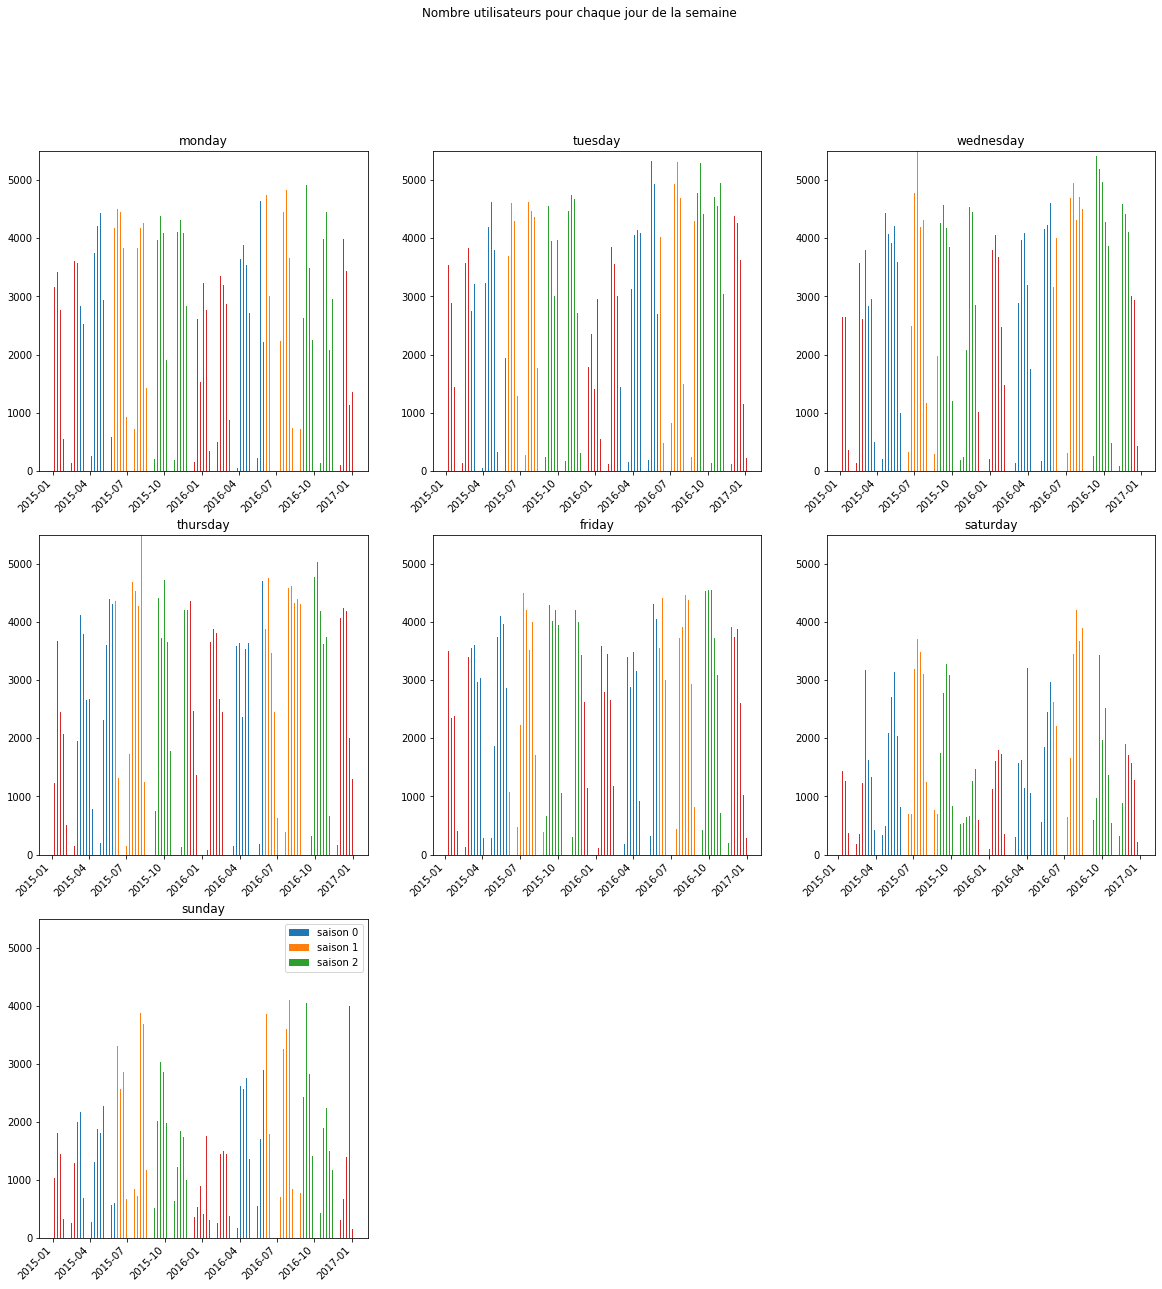

In [24]:
#histogramme synthetique - avec prise en compte saison
#Help - Label
for j in range (0,4):
    plt.figure(1,figsize = (20, 20))
    plt.suptitle('Nombre utilisateurs pour chaque jour de la semaine')
    plt.legend(labels = ("saison 0", "saison 1", "saison 2", "saison 3"))
    for i in range(0,7):
        plt.subplot(3,3,i+1, title=day[i])
        plt.xticks(rotation=45,horizontalalignment="right")
        plt.ylim(ymax=5500)
        plt.bar(df_london[(df_london['weekofday'] == i) & (df_london['season']==j)]['timestamp'],df_london[(df_london['weekofday'] == i) & (df_london['season']==j)]['cnt'])


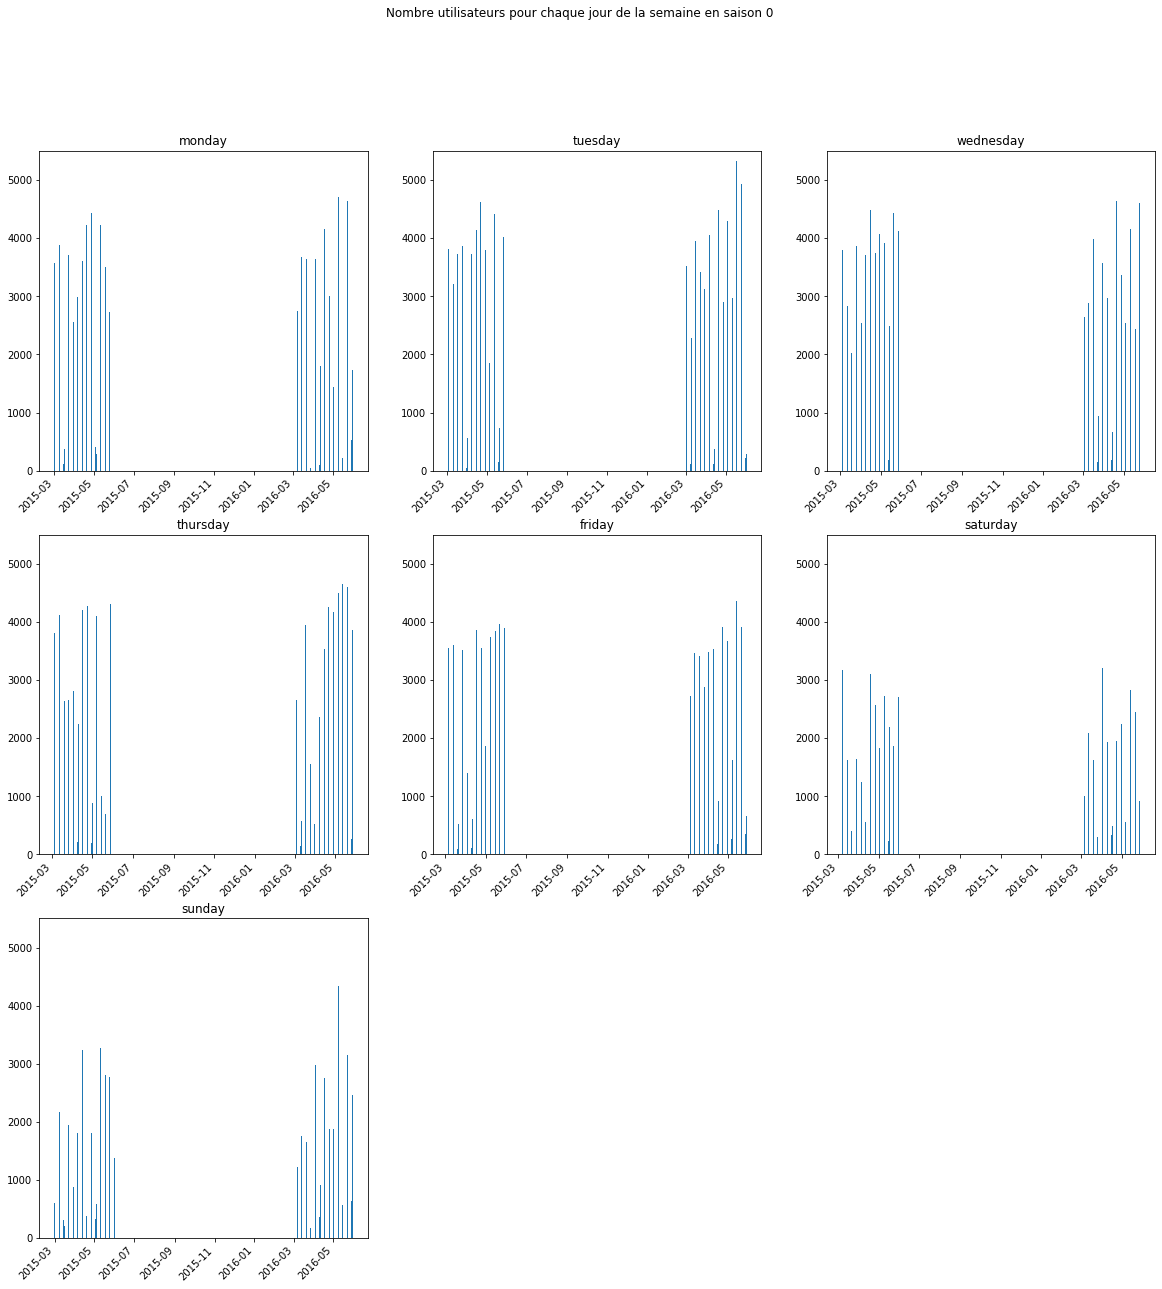

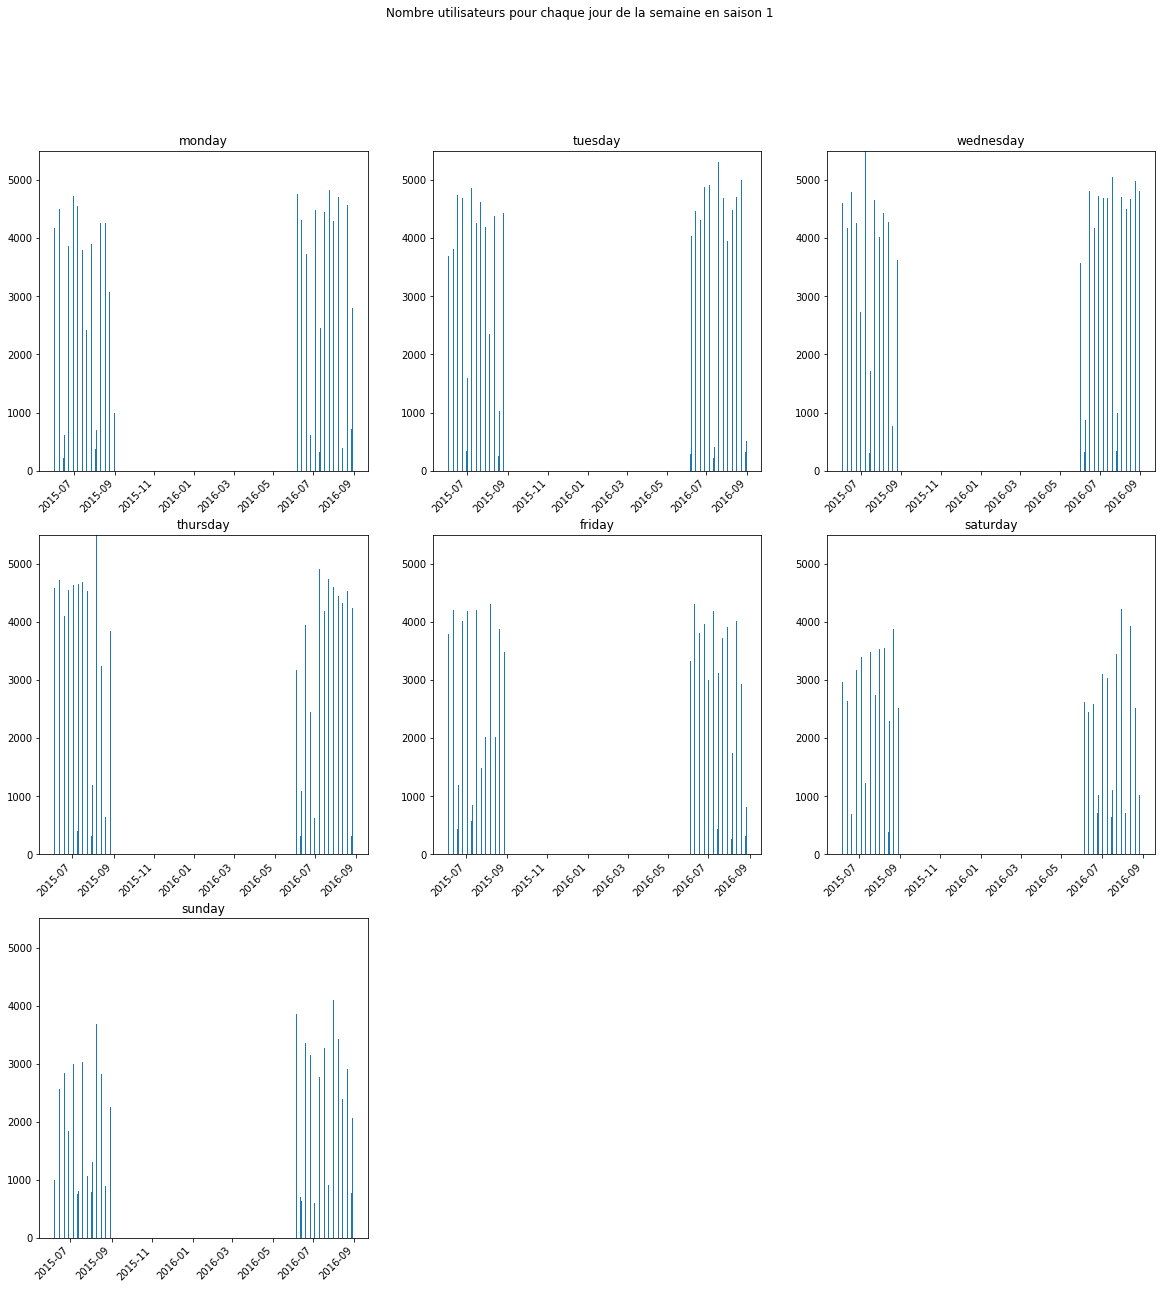

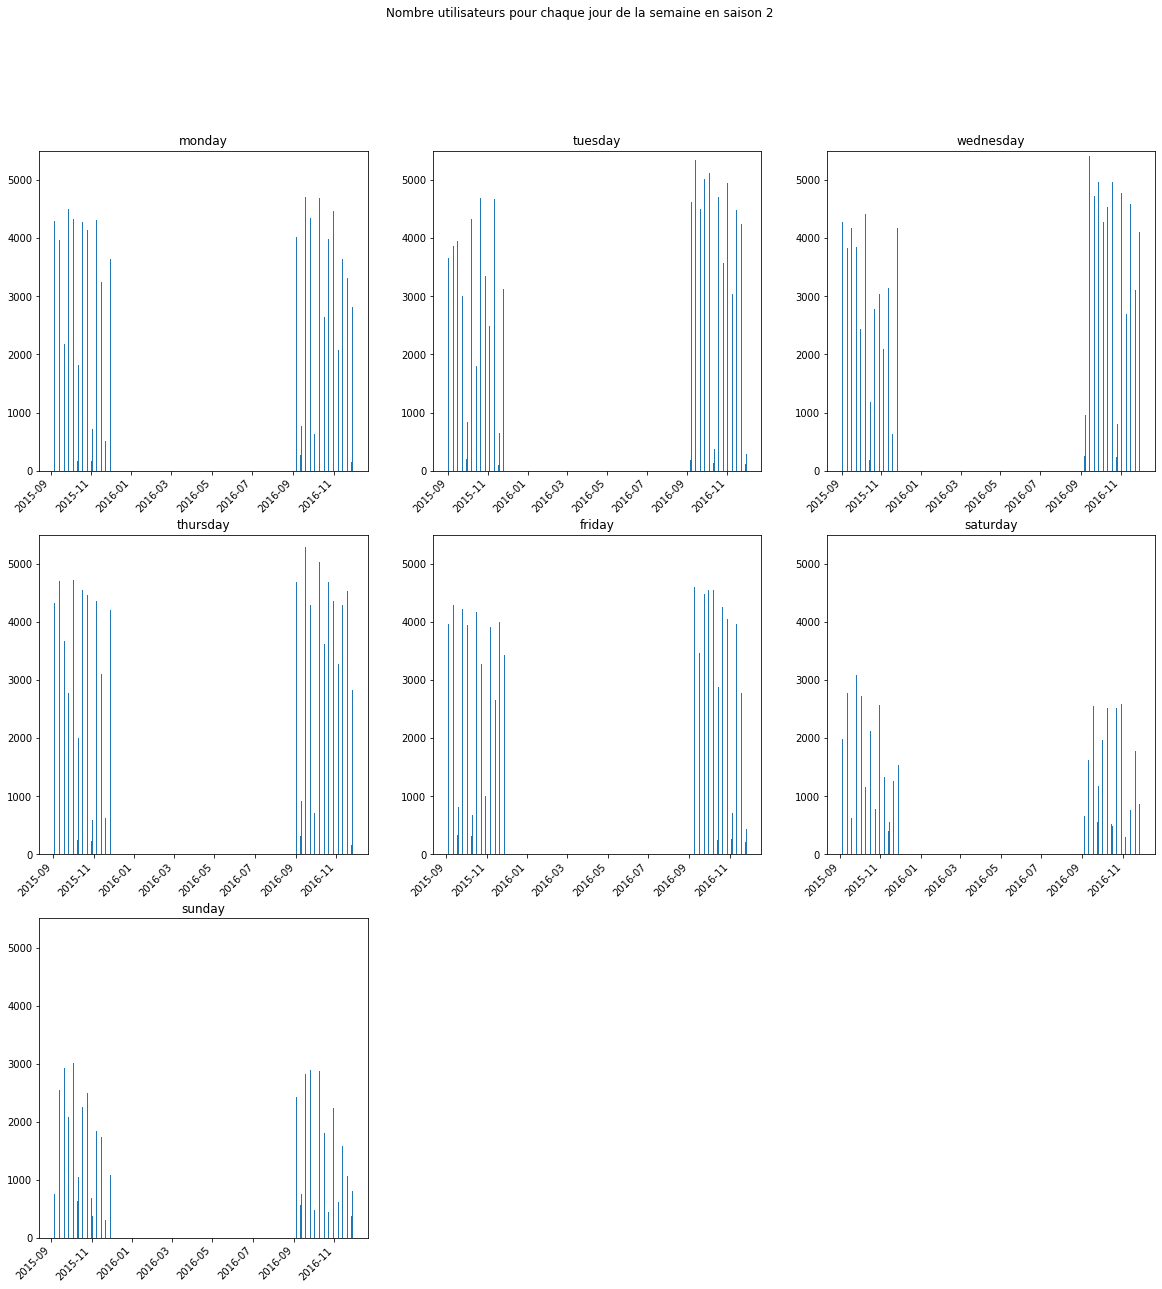

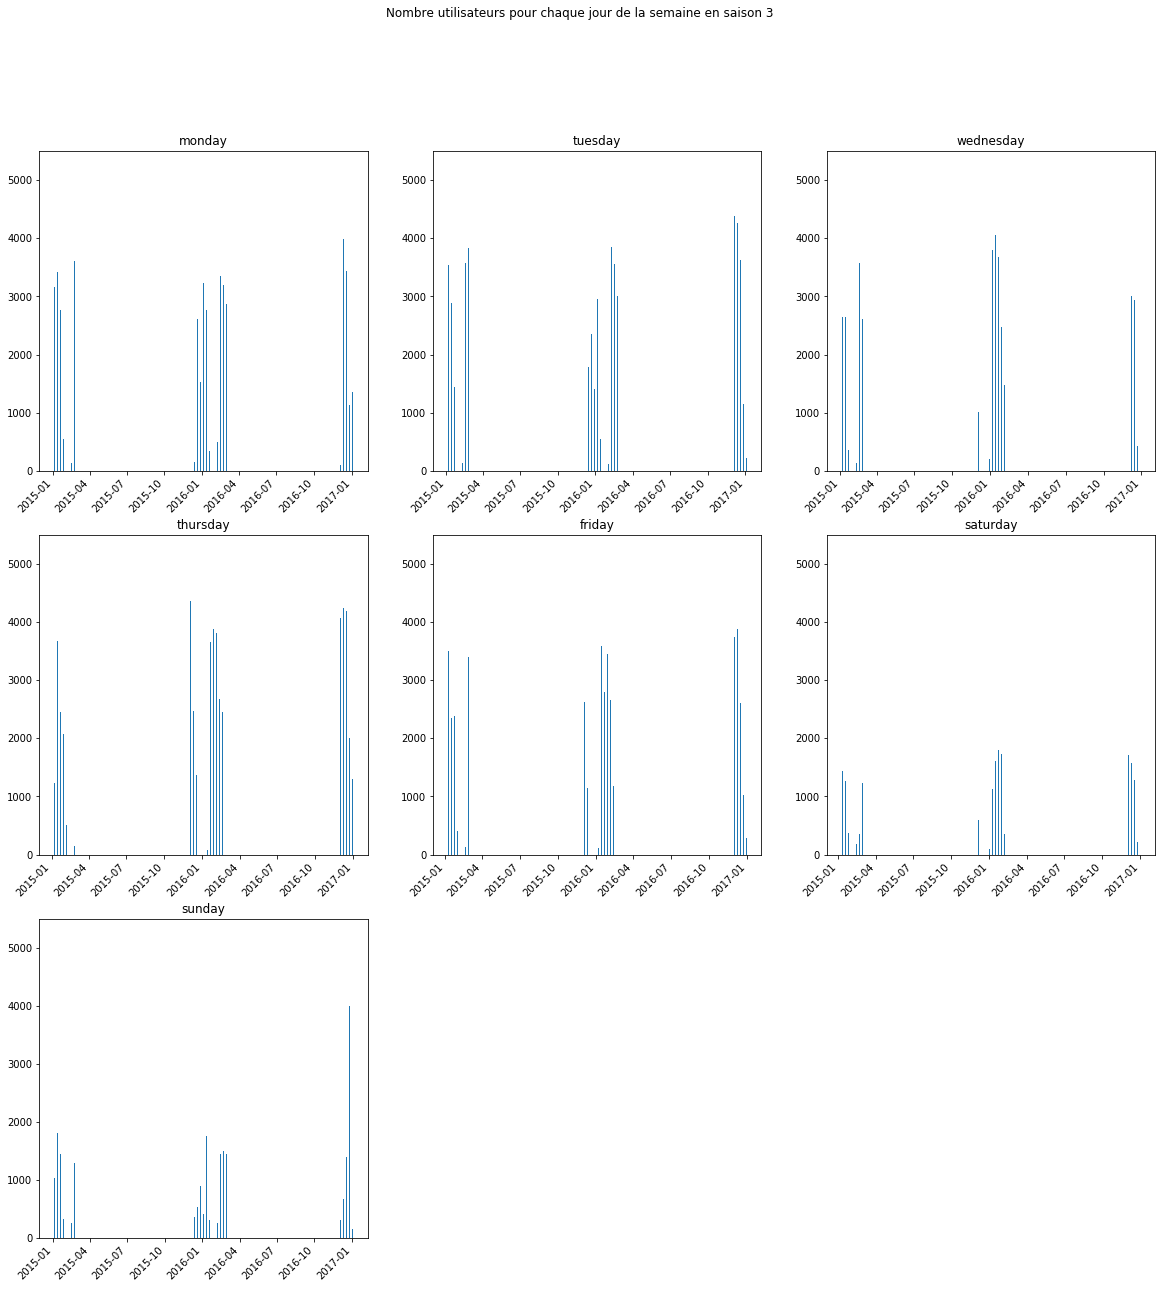

In [25]:
#histogramme different pour chaque jour, repertorie par saison
for j in range (0,4):
    plt.figure(j+1,figsize = (20, 20))
    plt.suptitle('Nombre utilisateurs pour chaque jour de la semaine en saison %i' %j)
    for i in range(0,7):
        plt.subplot(3,3,i+1, title=day[i])
        plt.xticks(rotation=45,horizontalalignment="right")
        plt.ylim(ymax=5500)
        plt.bar(df_london[(df_london['weekofday'] == i) & (df_london['season']==j)]['timestamp'],df_london[(df_london['weekofday'] == i) & (df_london['season']==j)]['cnt'])

#saisonnalite se traduit par une variation importante du nb de location - serait ce un effet de debut mois

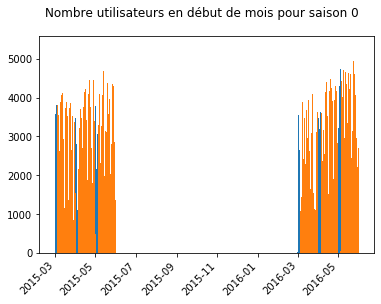

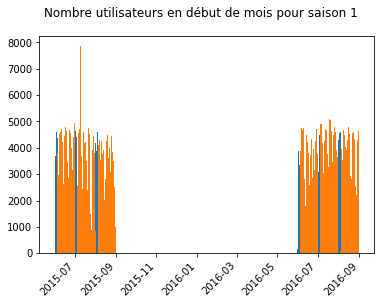

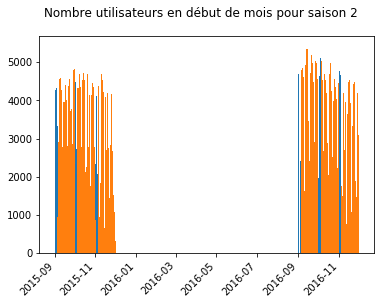

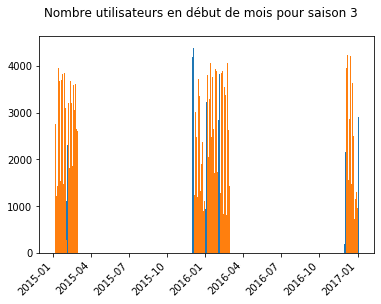

In [26]:
#etudie si effet début de mois

for i in range(0,4):
    plt.figure(i+1)
    plt.xticks(rotation=45,horizontalalignment="right")
    plt.suptitle('Nombre utilisateurs en début de mois pour saison %i' %i)
    plt.bar(df_london[(df_london['timestamp'].dt.day < 5)&(df_london['season']== i)]['timestamp'],df_london[(df_london['timestamp'].dt.day <5)&(df_london['season']== i)]['cnt'])
    plt.bar(df_london[(df_london['timestamp'].dt.day >= 5)&(df_london['season']== i)]['timestamp'],df_london[(df_london['timestamp'].dt.day >=5)&(df_london['season']== i)]['cnt'])
    
#ce ne sont pas des effets en début de début de mois mais de début/fin de journee >> fort effet de l'heure

In [27]:
## Par HEURE - Moyenne
import numpy as np

df_london[(df_london['weekofday'] == 0)].groupby('hour').agg({'cnt': np.mean})['cnt']

hour
0      212.471154
1      119.663462
2       74.605769
3       49.240385
4       52.355769
5      112.221154
6      536.807692
7     1759.971429
8     3504.800000
9     1802.523810
10     914.209524
11     924.714286
12    1158.171429
13    1223.278846
14    1178.634615
15    1281.221154
16    1689.638095
17    3130.714286
18    2990.600000
19    1759.990476
20    1075.750000
21     698.067308
22     498.447619
23     312.219048
Name: cnt, dtype: float64

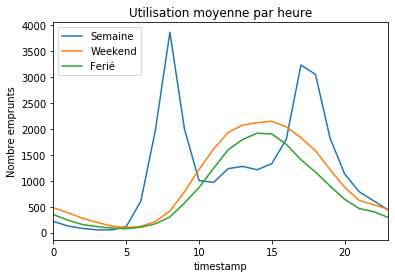

In [28]:
def hourly_plot(Filter,title):
    Filter.groupby(by=df_london.timestamp.dt.hour)['cnt'].mean().plot()
    plt.title(title)
    plt.ylabel('Nombre emprunts')
    plt.legend(['Semaine','Weekend','Ferié'],loc=2, fontsize = 'medium')
    
hourly_plot(df_london[(df_london['is_weekend'] == 0)], 'Utilisation moyenne par heure')
hourly_plot(df_london[(df_london['is_weekend'] == 1)], 'Utilisation moyenne par heure')
hourly_plot(df_london[(df_london['is_holiday'] == 1)], 'Utilisation moyenne par heure')

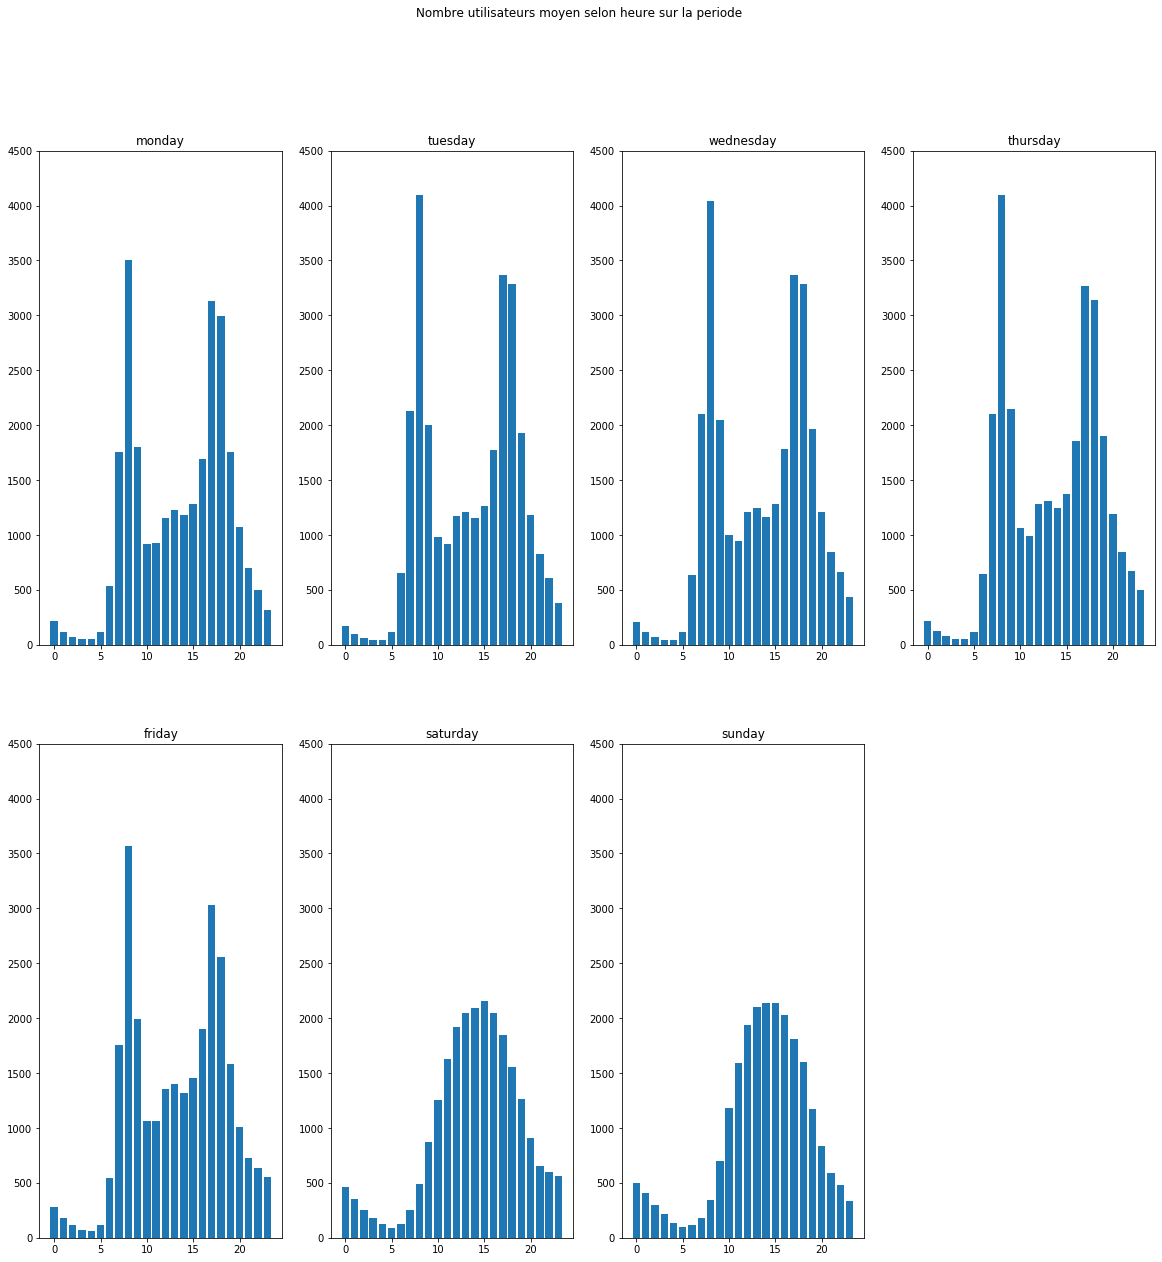

In [29]:
# Cette tendance aux heures de pointe s'observe pour tous les jours de la semaine

plt.figure(1, figsize=(20,20))
plt.suptitle('Nombre utilisateurs moyen selon heure sur la periode')
for s in range(0,7):
    plt.subplot(2,4,s+1, title=day[s])
    plt.ylim(ymax=4500)
    plt.bar(df_london[(df_london['weekofday'] == s)].groupby('hour').agg({'cnt': np.mean}).index,df_london[(df_london['weekofday'] == s)].groupby('hour').agg({'cnt': np.mean})['cnt'])
    

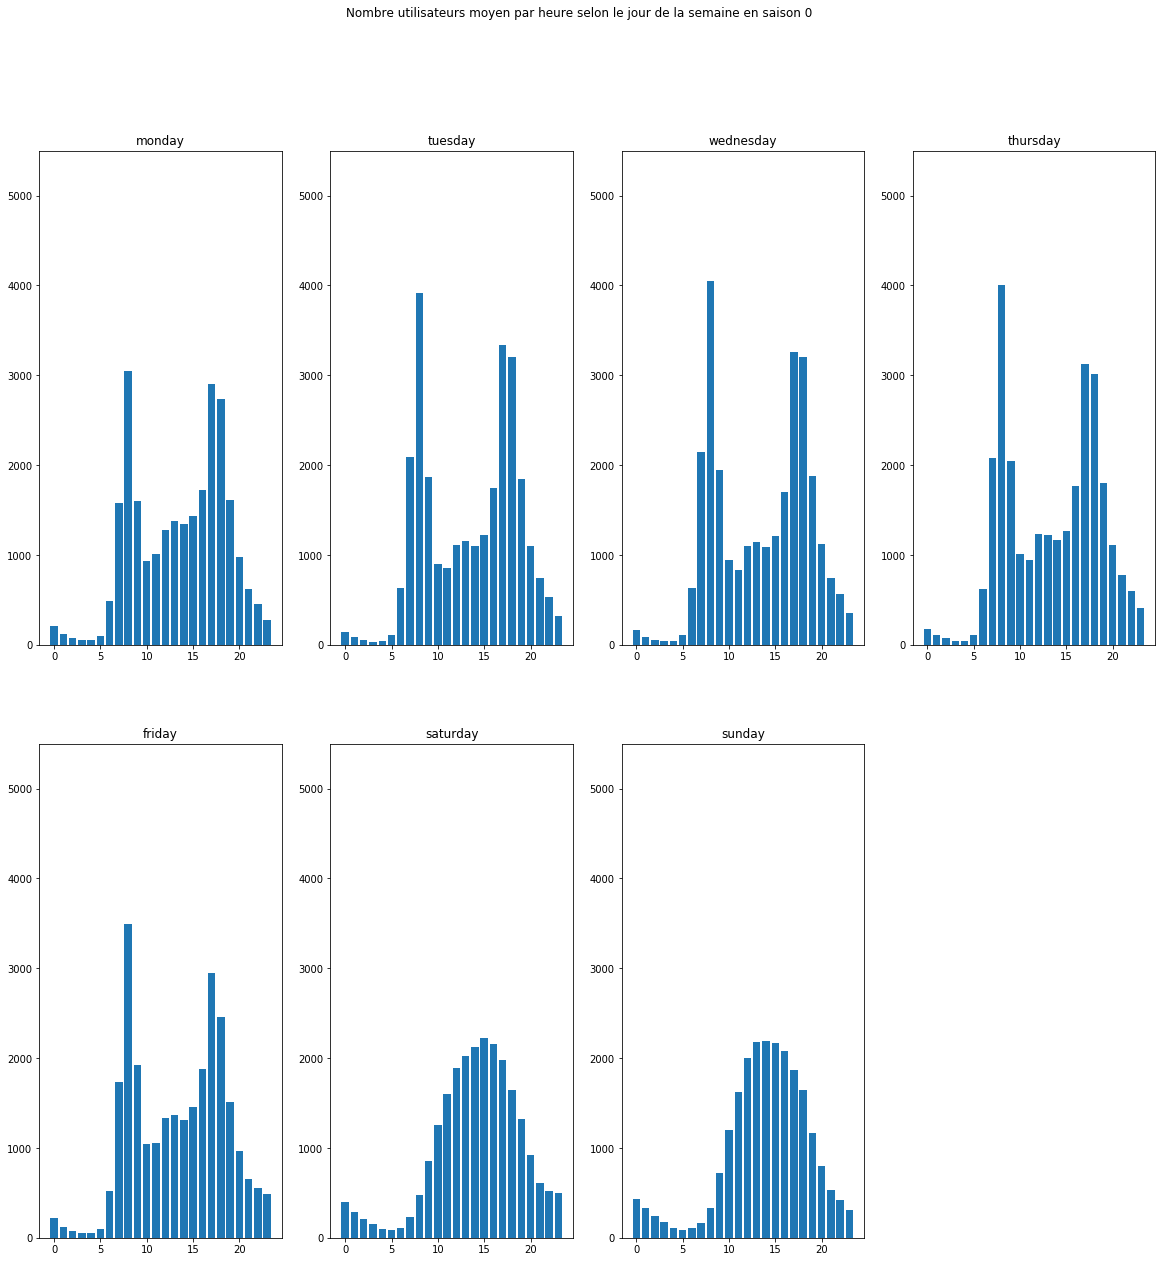

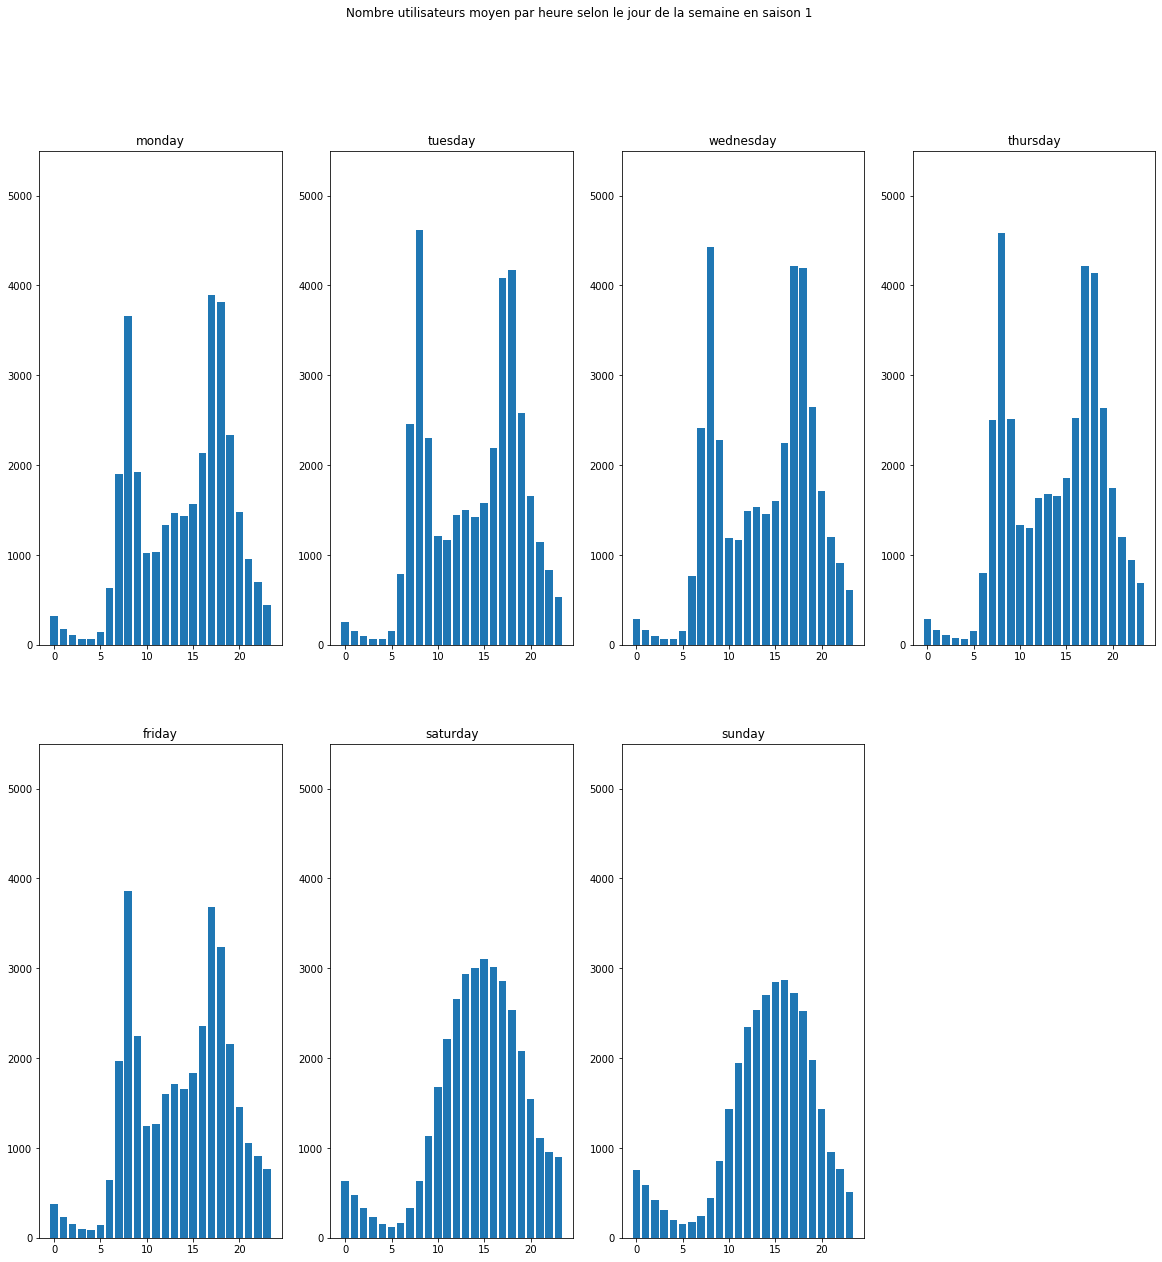

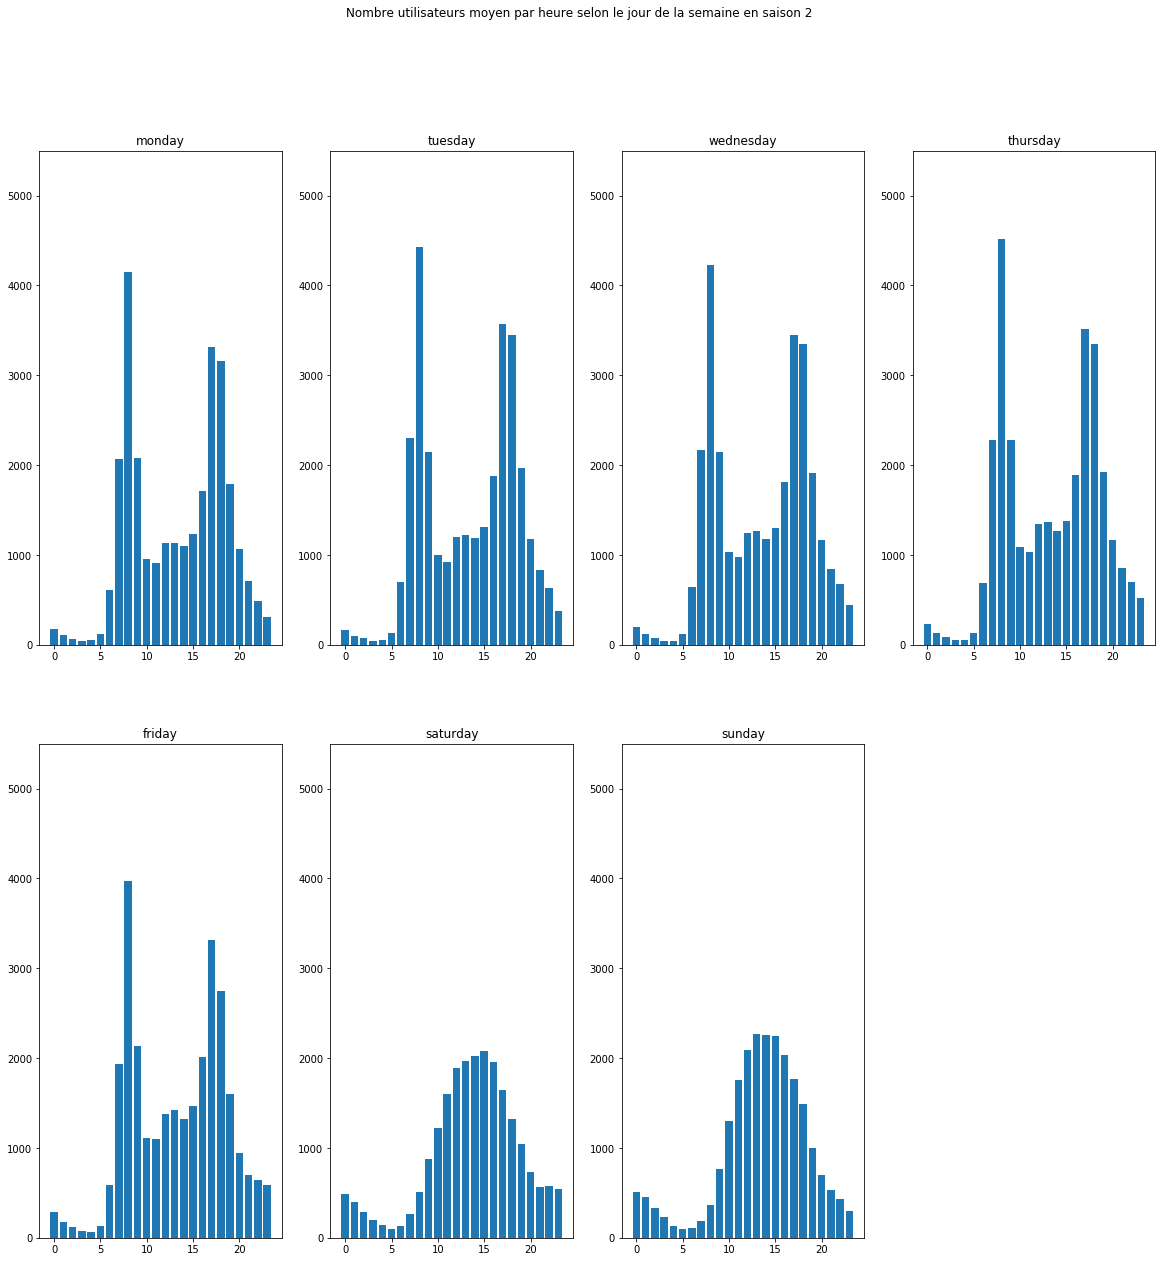

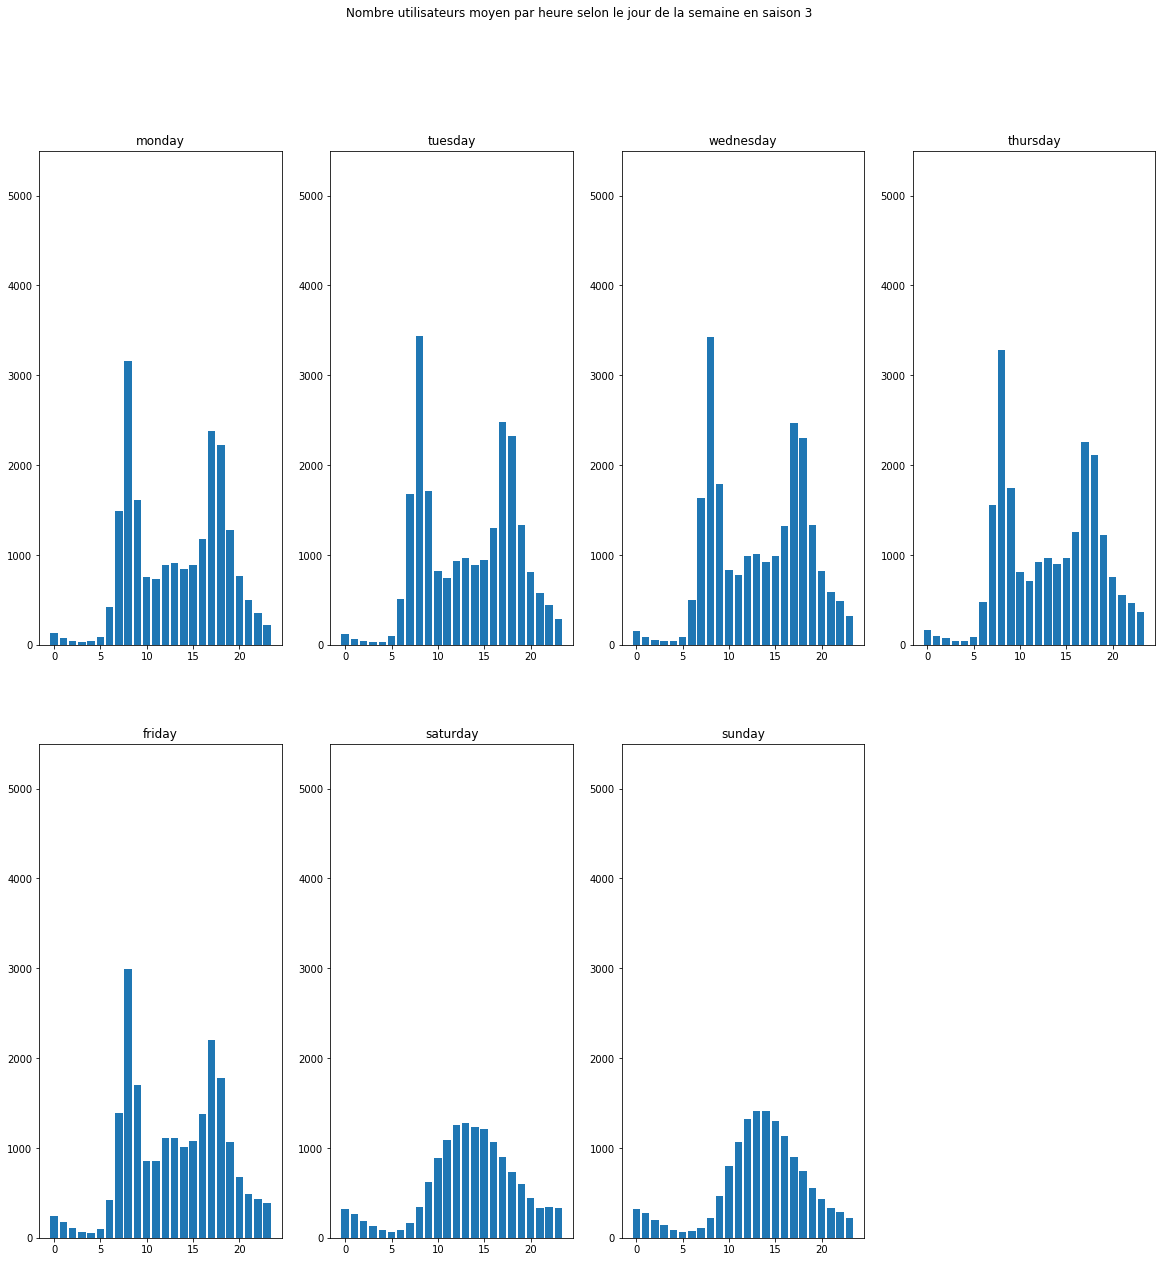

In [30]:
#nb ut moyen par heure selon le jour de la semaine et la saison

for s in range(0,4):
    plt.figure(s+1, figsize=(20,20))
    plt.suptitle('Nombre utilisateurs moyen par heure selon le jour de la semaine en saison %i' %s)
    for d in range(0,7):
        plt.subplot(2,4,d+1, title=day[d])
        plt.ylim(ymax=5500)
        plt.bar(df_london[(df_london['weekofday'] == d)&(df_london['season'] == s)].groupby('hour').agg({'cnt': np.mean}).index,df_london[(df_london['weekofday'] == d)&(df_london['season'] == s)].groupby('hour').agg({'cnt': np.mean})['cnt'])
  

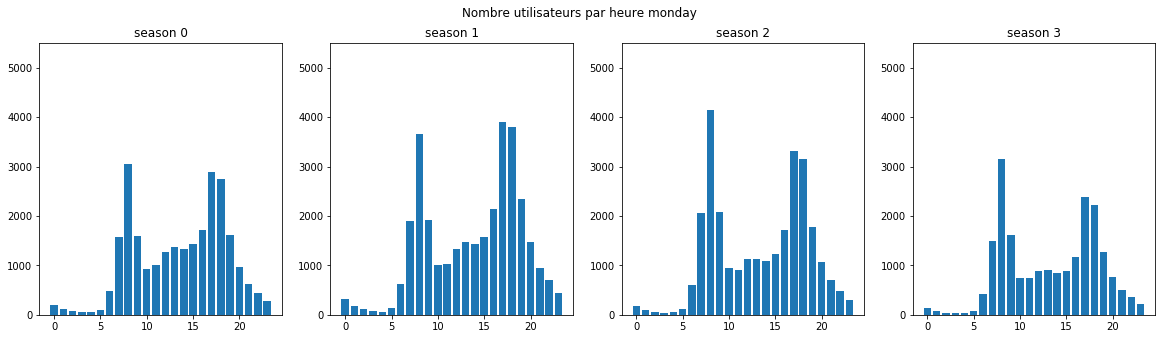

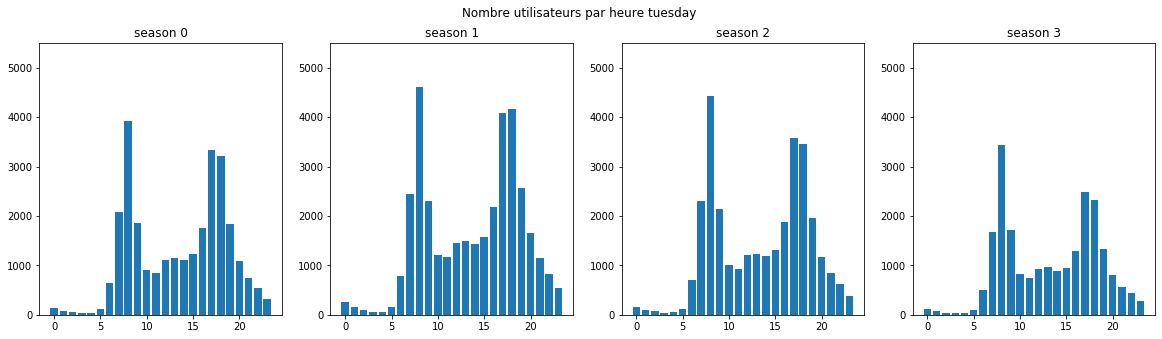

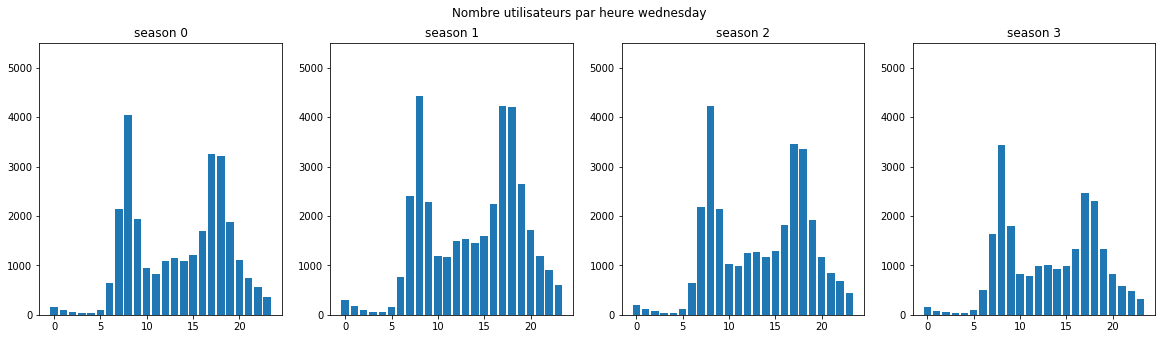

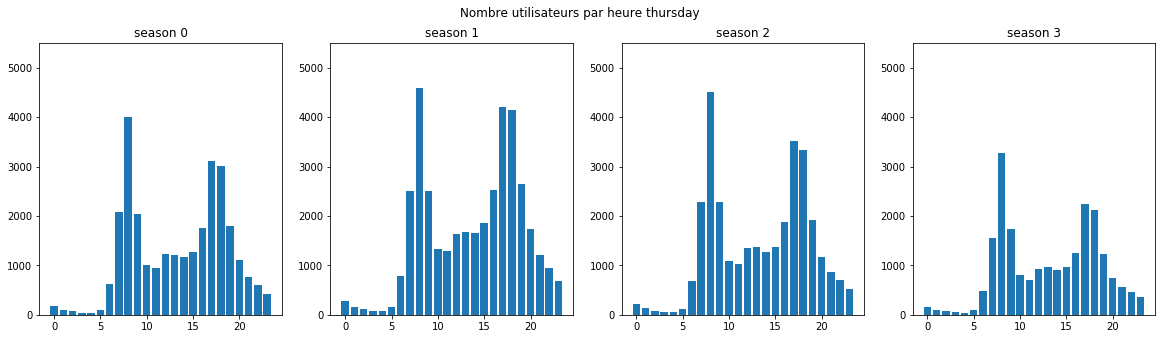

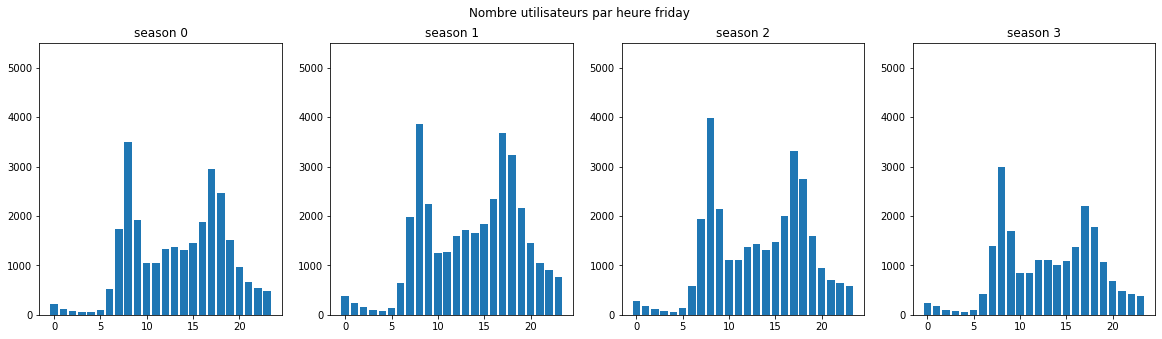

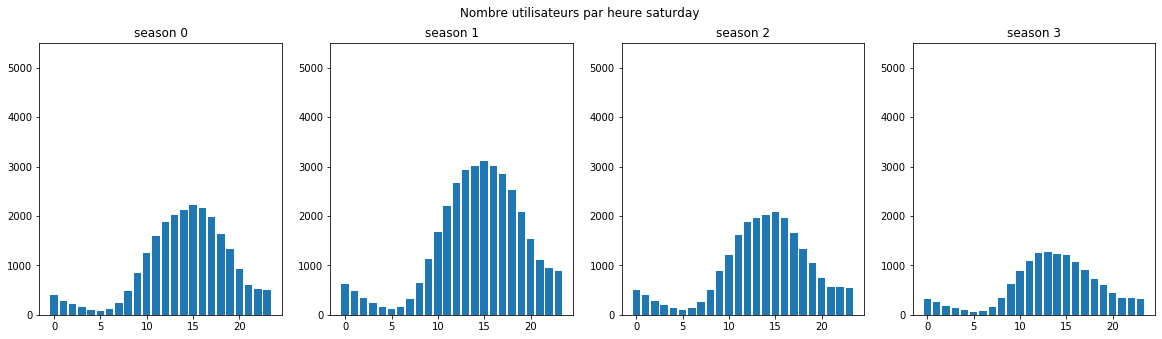

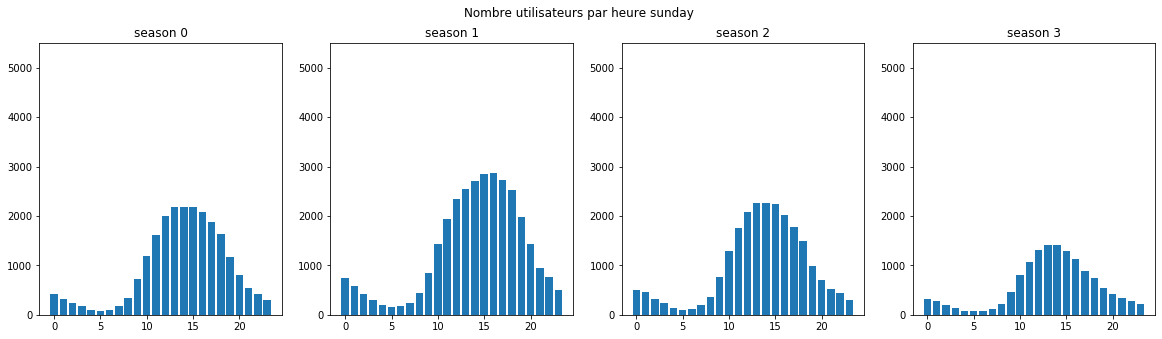

In [31]:
#nb ut moyen par heure selon la saison, regroupe par jour

for d in range(0,7):
    plt.figure(d+1, figsize=(20,5))
    plt.suptitle('Nombre utilisateurs par heure %s' %day[d])
    for s in range(0,4):
        plt.subplot(1,4,s+1, title=('season %i' %s))
        plt.ylim(ymax=5500)
        plt.bar(df_london[(df_london['weekofday'] == d)&(df_london['season'] == s)].groupby('hour').agg({'cnt': np.mean}).index,df_london[(df_london['weekofday'] == d)&(df_london['season'] == s)].groupby('hour').agg({'cnt': np.mean})['cnt'])

# confirmation 2 effets: heures (M/AM) + saison (faible sensibilité excepté le week end surtout en saison3)
# discriminer par saison 3/non 
# 3 tendances horaires: soirée/nuit - matin - journee - AM
# variable categorielle a creer


In [32]:
# fait des variables categ pour les heures
#df_london["hour"]=df_london["hour"].astype('int')
#soir/nuit
df_london.loc[((df_london['hour']>19) | (df_london['hour']<7)),'hour_cat']=0
#matin
df_london.loc[((df_london['hour']>=7)&(df_london['hour']<=9)),'hour_cat']=1
#journee
df_london.loc[((df_london['hour']>=10)&(df_london['hour']<=15)),'hour_cat']=2
#AM
df_london.loc[(df_london['hour']>=16)&(df_london['hour']<=19),'hour_cat']=3

df_london["hour_cat"]=df_london["hour_cat"].astype('int')
df_london["hour_cat"]=df_london["hour_cat"].astype('category')

In [33]:
#verifie la transformation
df_london.tail(50)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,weekofday,hour,month,weekofdayN,hour_cat
17364,2017-01-01 22:00:00,119,5.0,2.0,93.0,12.0,3,False,True,3,6,22,1,Sunday,0
17365,2017-01-01 23:00:00,89,5.0,2.5,90.0,10.0,1,False,True,3,6,23,1,Sunday,0
17366,2017-01-02 00:00:00,84,5.0,2.0,87.0,13.0,1,True,False,3,0,0,1,Monday,0
17367,2017-01-02 01:00:00,62,5.0,2.0,87.0,12.0,1,True,False,3,0,1,1,Monday,0
17368,2017-01-02 02:00:00,41,4.5,1.5,90.0,14.0,1,True,False,3,0,2,1,Monday,0
17369,2017-01-02 03:00:00,23,3.5,0.5,90.0,13.0,1,True,False,3,0,3,1,Monday,0
17370,2017-01-02 04:00:00,18,3.0,0.5,93.0,8.0,2,True,False,3,0,4,1,Monday,0
17371,2017-01-02 05:00:00,35,3.0,2.5,93.0,5.0,2,True,False,3,0,5,1,Monday,0
17372,2017-01-02 06:00:00,64,3.0,0.0,87.0,10.0,2,True,False,3,0,6,1,Monday,0
17373,2017-01-02 07:00:00,111,3.0,0.0,87.0,9.0,1,True,False,3,0,7,1,Monday,1


In [34]:
#statistiques générales
df_london.describe()
#en moyenne 1100 prises par heure
#temperature de 10deg et humidite de 70%

,cnt,t1,t2,hum,wind_speed,hour,month
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,11.513265,6.514643
std,1085.108068,5.571818,6.615145,14.313186,7.894570,6.915893,3.452509
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,0.000000,1.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,6.000000,4.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,12.000000,7.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,18.000000,10.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,23.000000,12.000000


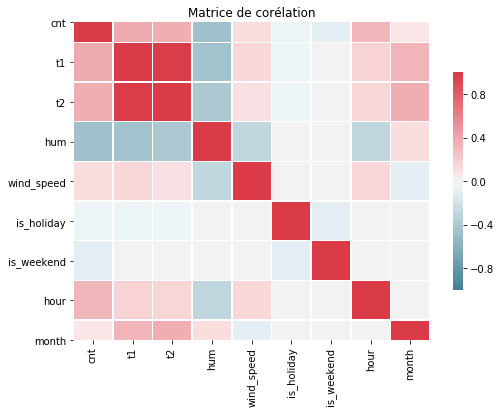

In [35]:
# Corrélation entre les variables météo
import seaborn as sns
def plot_heatmap_corr(df):    
    f, ax = plt.subplots(figsize=(8, 8))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(df.corr(), cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title('Matrice de corélation')
    
plot_heatmap_corr(df_london)

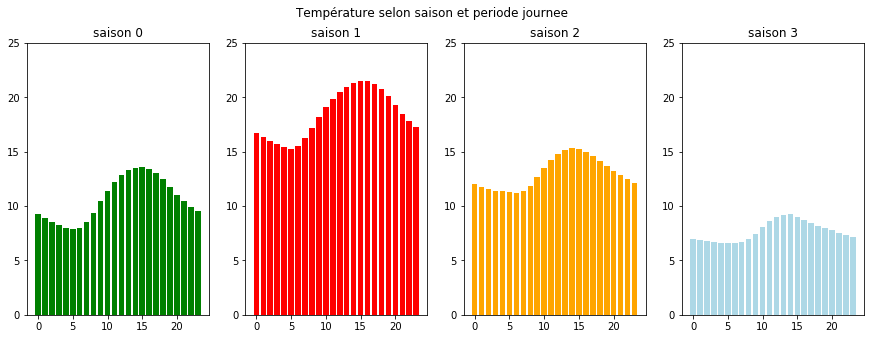

In [36]:
# a quoi est reliée la temperature: intuitivement heure et saison +humidite

#temperature moyenne par periode journee selon la saison
plt.figure(1,figsize = (15, 5))
plt.suptitle('Température selon saison et periode journee')
col=['green','red','orange', 'lightblue']

for s in range(0,4):
    plt.subplot(1,4,s+1, title=('saison %s'%s))
    plt.ylim(ymax=25)
    plt.bar(df_london[(df_london['season'] == s)].groupby('hour').agg({'t1': np.mean}).index,df_london[(df_london['season'] == s)].groupby('hour').agg({'t1': np.mean})['t1'], color=col[s])



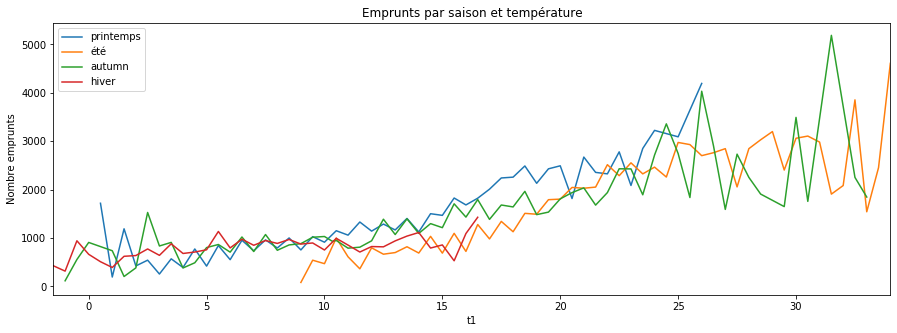

In [37]:
# Emprunts par saison et température
def Temp_Season(Filter,title):
    Filter.groupby(by=df_london.t1)['cnt'].mean().plot()
    plt.title(title)
    plt.ylabel('Nombre emprunts')
    plt.legend(['printemps','été','autumn', 'hiver'],loc=2, fontsize = 'medium')

for i in range(0,4):
    plt.figure(1,figsize = (15, 5))
    Temp_Season(df_london[(df_london['season'] == i)], 'Emprunts par saison et température')


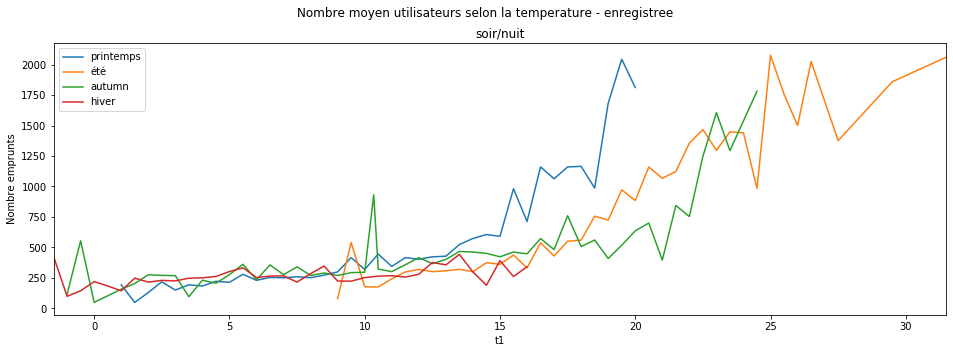

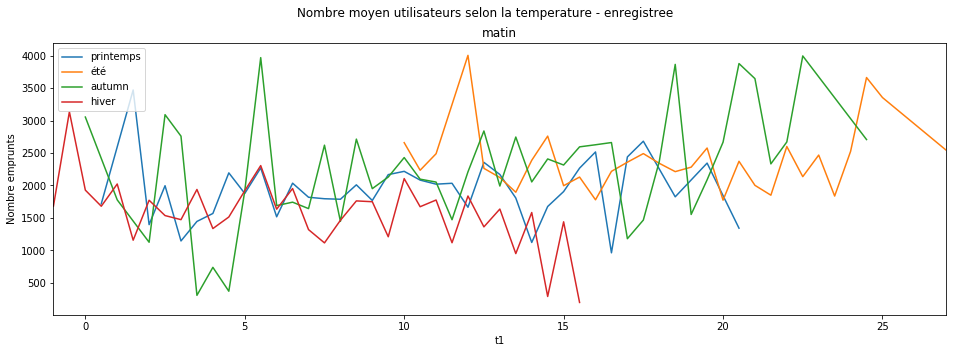

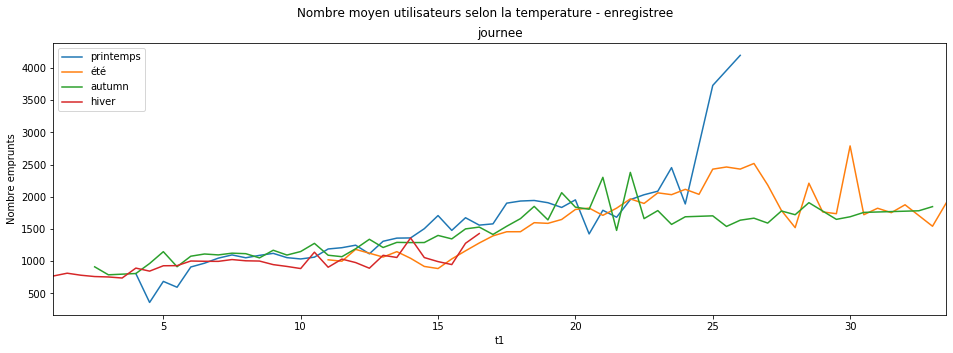

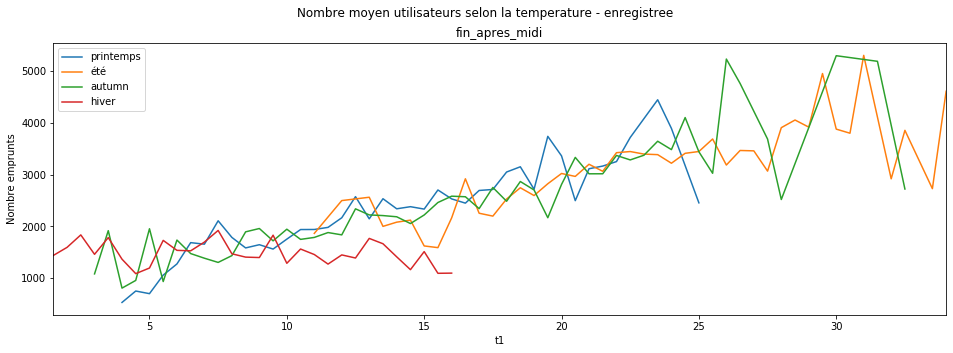

In [41]:
#Nombre moyen utilisateurs selon la temperature et par période de la journée
periode=['soir/nuit','matin','journee','fin_apres_midi']
def Test(Filter,title):
    Filter.groupby(by=df_london.t1 )['cnt'].mean().plot()
    plt.title(title)
    plt.ylabel('Nombre emprunts')
    plt.legend(['printemps','été','autumn', 'hiver'],loc=2, fontsize = 'medium')

for s in range(0,4):
    plt.figure(s+1,figsize = (16, 5))
    plt.suptitle('Nombre moyen utilisateurs selon la temperature - enregistree')
    for h in range (0,4):
        Test(df_london[(df_london['season'] == h)&(df_london['hour_cat'] == s)], periode[s])
             

#pour la temperature ressentie  on a les mêmes observations

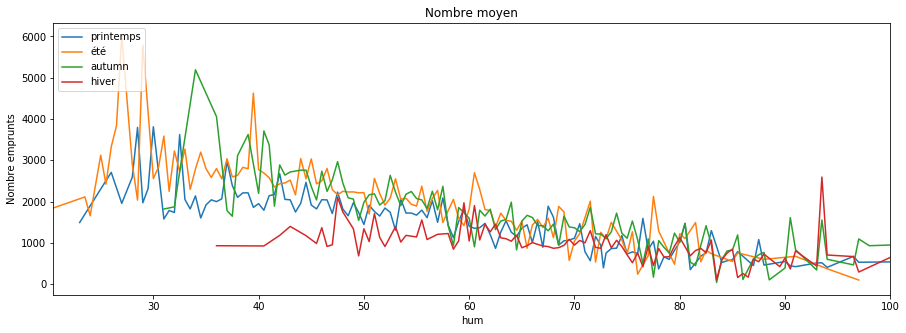

In [42]:
## Humidité 
#Nombre moyen utilisateurs selon l'humidité, par saison

def Test(Filter,title):
    Filter.groupby(by=df_london.hum)['cnt'].mean().plot()
    plt.title(title)
    plt.ylabel('Nombre emprunts')
    plt.legend(['printemps','été','autumn', 'hiver'],loc=2, fontsize = 'medium')

for s in range(0,4):
    plt.figure(1,figsize = (15, 5))
    Test(df_london[(df_london['season'] == s)],'Nombre moyen')

<BarContainer object of 17414 artists>

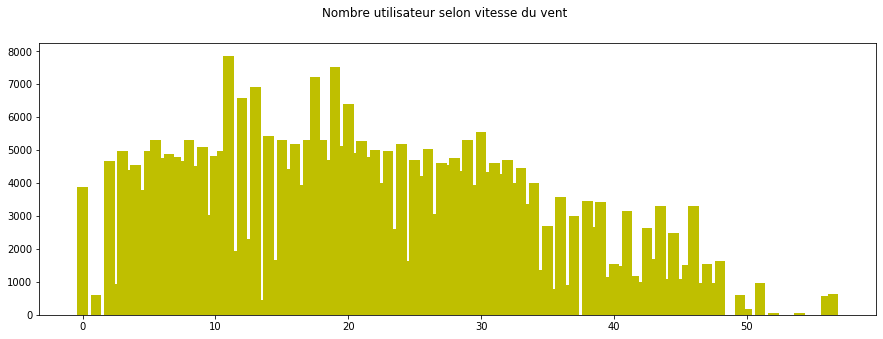

In [43]:
## VENT ##

#Nombre ut selon vitesse du vent
plt.figure(1,figsize = (15, 5))
plt.suptitle('Nombre utilisateur selon vitesse du vent')
plt.bar(df_london['wind_speed'],df_london['cnt'], color='y')

#induit relation légèrement décroissante dépassé les 30KM/H
#necessite analyse plus fine

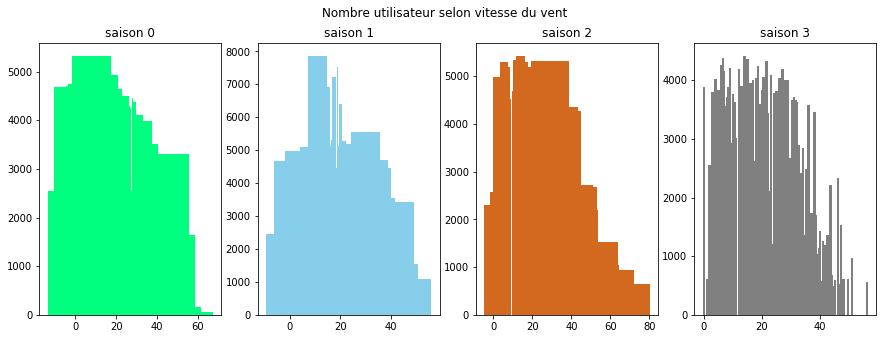

In [44]:
#nb ut selon vitesse vent et saison
plt.figure(1,figsize = (15, 5))
plt.suptitle('Nombre utilisateur selon vitesse du vent')
col=['springgreen','skyblue','chocolate', 'grey']

for s in range(0,4):
    plt.subplot(1,4,s+1, title=('saison %s'%s))
    plt.bar(df_london[(df_london['season'] == s)]['wind_speed'],df_london[(df_london['season'] == s)]['cnt'], color=col[s])

#relation décroissante depassé un certain seuil - saison 2 (ete) depassé 40km/h, spring (saison1) depassé les 25-30km/h décroit

In [45]:
df_london[(df_london['season'] == s)].groupby('weather_code').agg({'cnt': np.mean}).index

CategoricalIndex([1, 2, 3, 4, 7, 10, 26], categories=[1, 2, 3, 4, 7, 10, 26], ordered=False, name='weather_code', dtype='category')

<BarContainer object of 7 artists>

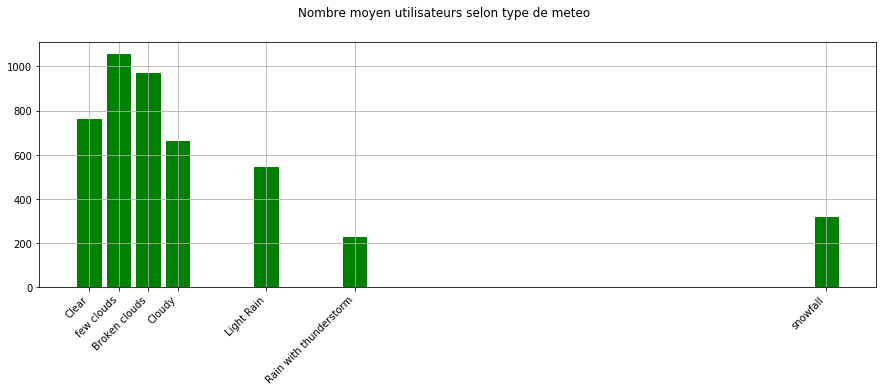

In [46]:
## WEATHER ##
#dépendrait de la saison

#analyse moyenne selon la période

plt.figure(1,figsize = (15, 5)).autofmt_xdate(rotation=45)
plt.suptitle('Nombre moyen utilisateurs selon type de meteo')
plt.subplot(1,1,1).set_xticklabels(['Clear','few clouds','Broken clouds','Cloudy','Light Rain','Rain with thunderstorm','snowfall','Freezing Fog'])
plt.xticks([1, 2, 3, 4, 7, 10, 26],rotation=45,horizontalalignment="right")
plt.grid(True)
plt.bar(df_london[(df_london['season'] == s)].groupby('weather_code').agg({'cnt': np.mean}).index,df_london[(df_london['season'] == s)].groupby('weather_code').agg({'cnt': np.mean})['cnt'], COLOR='g')

#un temps clair semble engendrer moins de location que temps peu nuageux - seulement legerement plus qu'un temps nuageaux
#necessite affiner par saison

<BarContainer object of 7 artists>

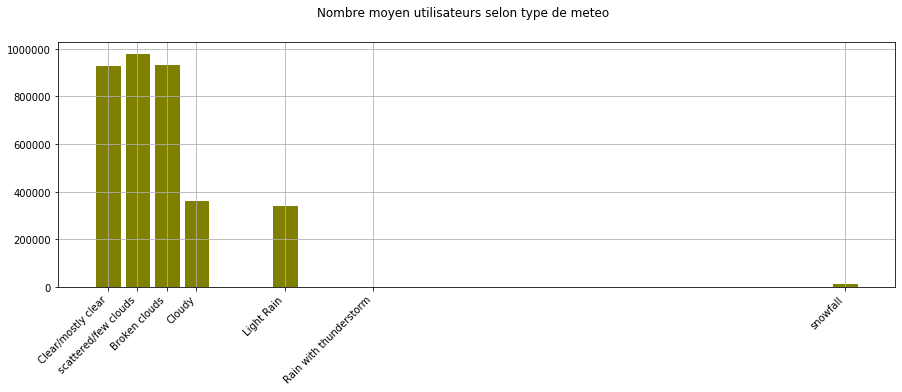

In [47]:
#analyse globale - toute la periode - en cumule
plt.figure(1,figsize = (15, 5)).autofmt_xdate(rotation=45)
plt.suptitle('Nombre moyen utilisateurs selon type de meteo')
plt.subplot(1,1,1).set_xticklabels(['Clear/mostly clear','scattered/few clouds','Broken clouds','Cloudy','Light Rain','Rain with thunderstorm','snowfall','Freezing Fog'])
plt.xticks([1, 2, 3, 4, 7, 10, 26],rotation=45,horizontalalignment="right")
plt.grid(True)
plt.bar(df_london[(df_london['season'] == s)].groupby('weather_code').agg({'cnt': np.sum}).index,df_london[(df_london['season'] == s)].groupby('weather_code').agg({'cnt': np.sum})['cnt'], COLOR='olive')

#echelle multipliee par 1000 - les catégories orage et neige sont quasi inexistantes

In [48]:
df_london.groupby(['weather_code'])['cnt'].agg('sum')

weather_code
1     7146847
2     6035580
3     4243887
4      929978
7     1526461
10       8168
26      15051
Name: cnt, dtype: int64

In [49]:
df_london['weather_code'].value_counts()

1     6150
2     4034
3     3551
7     2141
4     1464
26      60
10      14
Name: weather_code, dtype: int64

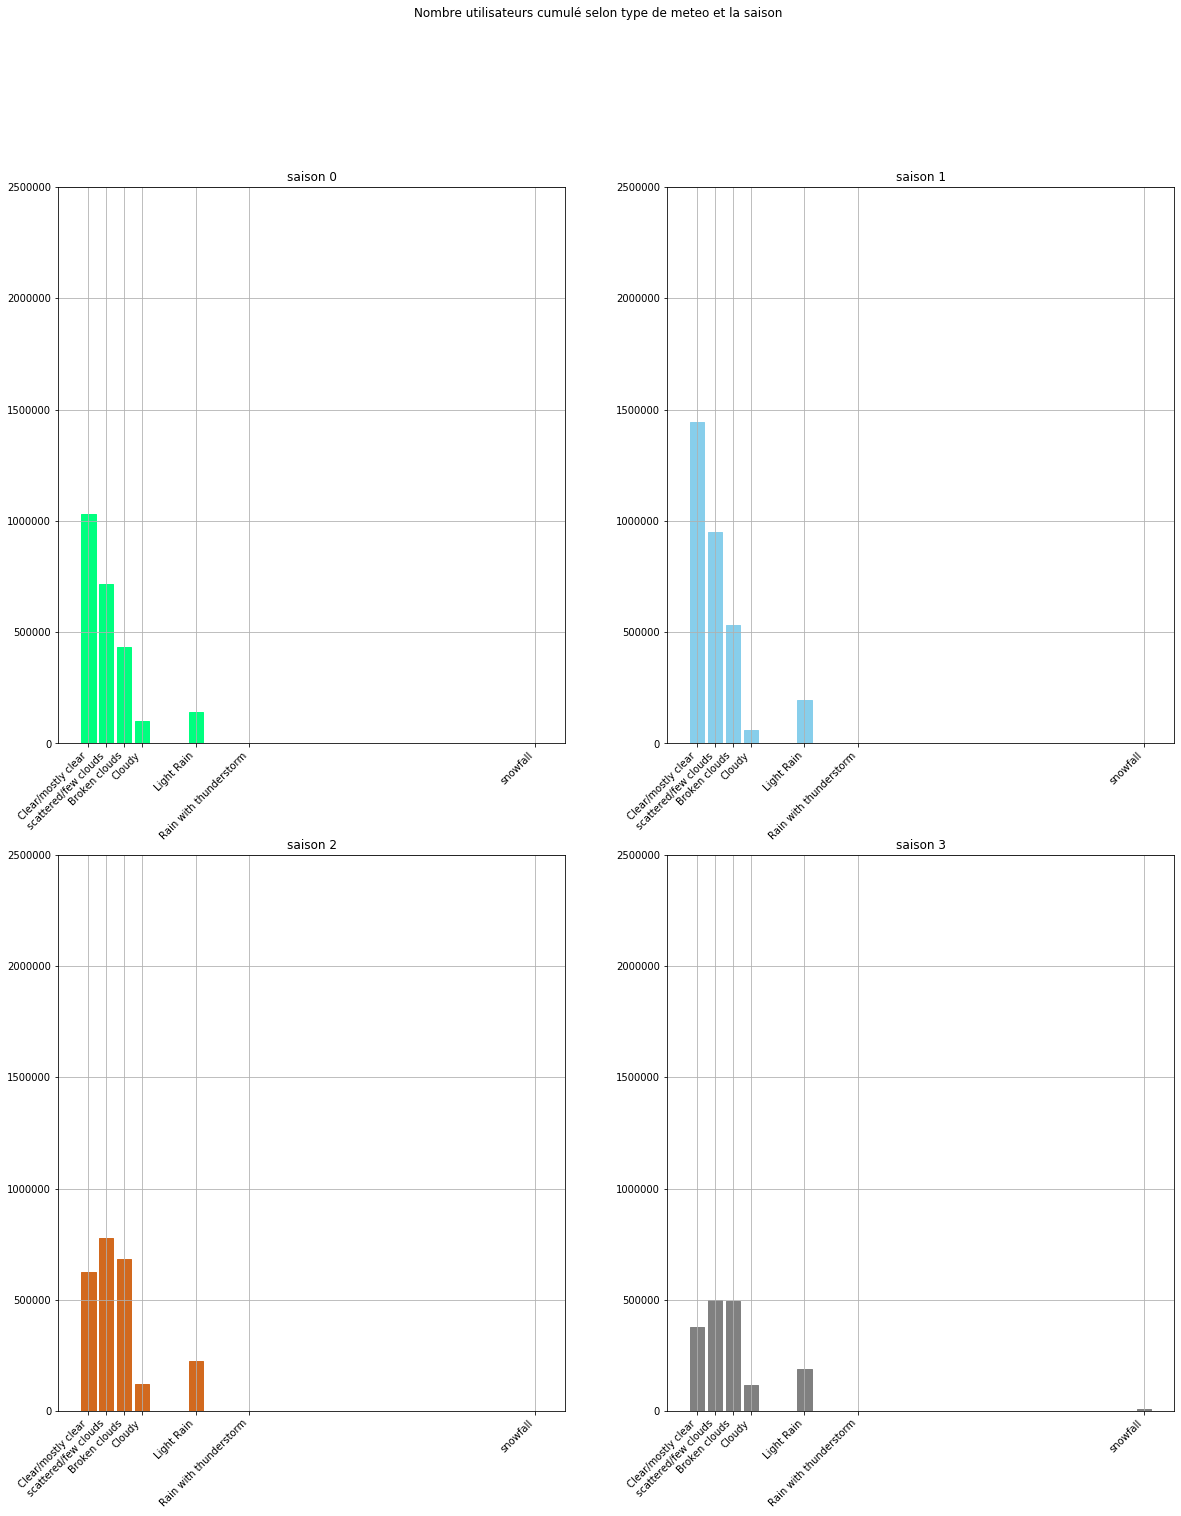

In [50]:
#en cumulé saisonnier

plt.figure(1,figsize = (20, 25)).autofmt_xdate(rotation=45)
plt.suptitle('Nombre utilisateurs cumulé selon type de meteo et la saison')

for s in range (0,4):
    plt.subplot(2,2,s+1, title=('saison %i' %s)).set_xticklabels(['Clear/mostly clear','scattered/few clouds','Broken clouds','Cloudy','Light Rain','Rain with thunderstorm','snowfall','Freezing Fog'])
    plt.xticks([1, 2, 3, 4, 7, 10, 26],rotation=45,horizontalalignment="right")
    plt.ylim(ymax=2500000)
    plt.grid(True)
    plt.bar(df_london[(df_london['season'] == s)&(df_london['timestamp'].dt.year == 2015)].groupby('weather_code').agg({'cnt': np.sum}).index,df_london[(df_london['season'] == s)&(df_london['timestamp'].dt.year == 2015)].groupby('weather_code').agg({'cnt': np.sum})['cnt'], COLOR=col[s])    
    #double click sur graphe pour zoomer

# saison 0/1 vs 2/3

#saison 0/1 - printemps/ete
#nb cumulé plus elevé en temps clair, decroissant avec degradation du temps (degradation suit l'echelle)
#une legere puis ne semble moins affecter que le temps nuageux (apparition probable d'une legere pluie en cours de journee)

#saison2/3
#quasi similitudes entre les nombre 3 premieres categories

In [51]:
# Même résultats qu'au dessus mais en valeur absolue
df_london.groupby(['season','weather_code'])['cnt'].sum()

season  weather_code
0       1               2005116.0
        2               1371457.0
        3                934271.0
        4                164592.0
        7                368763.0
        10                 5589.0
        26                  448.0
1       1               2680732.0
        2               2098572.0
        3               1080054.0
        4                155820.0
        7                407322.0
        10                 2109.0
        26                    NaN
2       1               1533600.0
        2               1587176.0
        3               1295479.0
        4                246558.0
        7                409392.0
        10                  242.0
        26                  593.0
3       1                927399.0
        2                978375.0
        3                934083.0
        4                363008.0
        7                340984.0
        10                  228.0
        26                14010.0
Name: cnt, dtype: float64

In [52]:
# Même fréquece mais en moyenne cette fois
df_london.groupby(['season','weather_code'])['cnt'].mean()

season  weather_code
0       1               1144.472603
        2               1436.080628
        3               1162.028607
        4                504.883436
        7                677.873162
        10               798.428571
        26                74.666667
1       1               1471.312843
        2               1875.399464
        3               1393.618065
        4                721.388889
        7                905.160000
        10               421.800000
        26                      NaN
2       1               1130.973451
        2               1534.986460
        3               1281.383778
        4                662.790323
        7                788.809249
        10               242.000000
        26                59.300000
3       1                760.163115
        2               1056.560475
        3                971.990635
        4                660.014545
        7                542.968153
        10               228.000000
       

# Modélisation

In [53]:
#Rappel composition base
df_london.head(10)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,weekofday,hour,month,weekofdayN,hour_cat
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,False,True,3,6,0,1,Sunday,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,False,True,3,6,1,1,Sunday,0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,False,True,3,6,2,1,Sunday,0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1,False,True,3,6,3,1,Sunday,0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,False,True,3,6,4,1,Sunday,0
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1,False,True,3,6,5,1,Sunday,0
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4,False,True,3,6,6,1,Sunday,0
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4,False,True,3,6,7,1,Sunday,1
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4,False,True,3,6,8,1,Sunday,1
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3,False,True,3,6,9,1,Sunday,1


In [54]:
df_london.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code          category
is_holiday                bool
is_weekend                bool
season                category
weekofday             category
hour                     int64
month                    int64
weekofdayN              object
hour_cat              category
dtype: object

In [55]:
#### on fait face a un problème de regression, on veut estimer la variable cnt, 
# le nombre d'utilisation/prise en charge/location par heure

In [56]:
## DECOMPOSITION BDD ##

#split la base en base_train et base_test afin tester nos estimations sur base nouvelle et non celle entrainement

#caractéristiques des observations: supprime variables inutiles/non exploitables
X=df_london.drop(['cnt','timestamp','weekofdayN',],axis=1)
#valeurs des observations : cible
y=df_london['cnt']

#opte pour une selection aléatoire - choix de 15% de la base comme base de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42)

In [57]:
## REGRESSION LINEAIRE ##
from sklearn.linear_model import LinearRegression

clr = LinearRegression()
clr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
#estimateurs
clr.coef_

array([  77.18737102,  -33.63102111,   -9.03217307,  -10.71590275,
        -37.77910905, -356.92392498, -232.22744232,  -18.66502278,
          3.72191866,   11.48672911,    5.60332802,  461.17062072])

In [59]:
#pour associer coefficients aux colonnes correspondants
X.head()

,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,weekofday,hour,month,hour_cat
0,3.0,2.0,93.0,6.0,3,False,True,3,6,0,1,0
1,3.0,2.5,93.0,5.0,1,False,True,3,6,1,1,0
2,2.5,2.5,96.5,0.0,1,False,True,3,6,2,1,0
3,2.0,2.0,100.0,0.0,1,False,True,3,6,3,1,0
4,2.0,0.0,93.0,6.5,1,False,True,3,6,4,1,0


In [60]:
from sklearn.metrics import r2_score
pred = clr.predict(X_test)
r2_score(y_test, pred)
#vigilence possibilité R2 biaisé

0.4715081437022407

In [61]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, clr.predict(X_test)))
#difference entre observations et estimations est de 500 - écart important aux heures creuses (soirs)
mse = np.mean((clr.predict(X_test) - y_test)**2)
print(mse)

547.209907794587
633302.1188580355


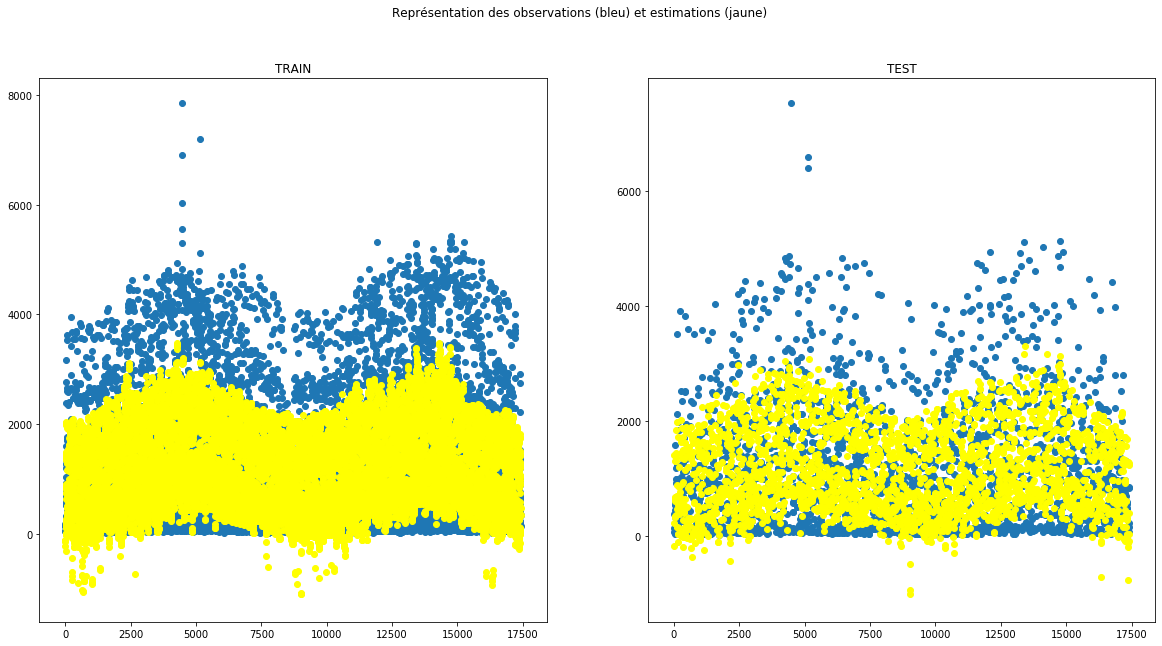

In [63]:
import matplotlib.pyplot as plt
plt.figure(1,figsize=(20,10))
plt.suptitle('Représentation des observations (bleu) et estimations (jaune)')
plt.subplot(1,2,1, title=('TRAIN'))
plt.scatter(y_train.index,y_train)
plt.scatter(y_train.index,clr.predict(X_train), color='yellow')
plt.subplot(1,2,2, title=('TEST'))
plt.scatter(y_test.index,y_test)
plt.scatter(y_test.index,clr.predict(X_test), color='yellow')
#tendance a sous estimer les emprunts

In [64]:
## REGRESSION RIDGE ## 
from sklearn.linear_model import Ridge
rid = Ridge(100).fit(X_train, y_train)
r2_score(y_test, rid.predict(X_test))

0.4713533357341926

In [65]:
clr.fit(X_train, y_train)
(r2_score(y_train, clr.predict(X_train)),
 r2_score(y_train, rid.predict(X_train)))

(0.48125899479228096, 0.48109179856626827)

In [66]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, rid.predict(X_test)))
mse = np.mean((rid.predict(X_test) - y_test)**2)
print(mse)

545.849362882522
633487.6282713077


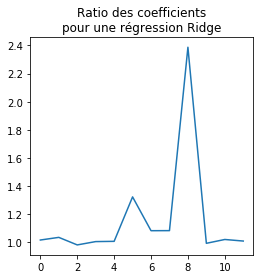

In [71]:
import numpy
import matplotlib.pyplot as plt
r = numpy.abs(clr.coef_) / numpy.abs(rid.coef_)
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(r)
ax.set_title("Ratio des coefficients\npour une régression Ridge");

In [72]:
## REGRESSION LASSO ##
from sklearn.linear_model import Lasso
las = Lasso(5.).fit(X_train, y_train)
las.coef_

#Aucun coeff n'est nul

array([  59.98002211,  -18.41615004,   -9.7067344 ,  -10.25130704,
        -36.46123489, -114.6520047 , -183.01343931,   -8.87483238,
         -0.96953474,   11.41699887,    3.62587628,  454.22346199])

In [73]:
lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(X_train,y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [74]:
r2_score(y_test, lassoReg.predict(X_test))

0.46305451917555374

In [75]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, lassoReg.predict(X_test)))
mse = np.mean((lassoReg.predict(X_test) - y_test)**2)
print(mse)


547.7203800483081
643432.2623237947


In [76]:
pip install yellowbrick 

     |████████████████████████████████| 263 kB 847 kB/s eta 0:00:01     |███████████████                 | 122 kB 847 kB/s eta 0:00:01
You should consider upgrading via the '/Users/Fidji/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


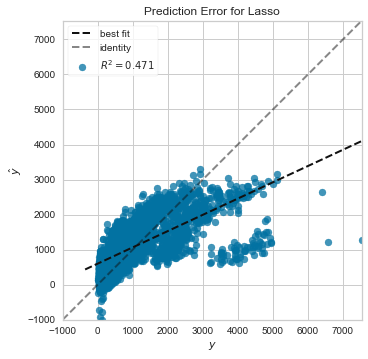

In [77]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import prediction_error

model = Lasso()
visualizer = prediction_error(model, X_train, y_train, X_test, y_test)

In [78]:
####### DECISION TREE #######

#premiere estimation par un Decision Tree: regression

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(min_samples_leaf=10)
dt.fit(X_train, y_train)

#methode MSE - 10 individus par feuille minimum

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [79]:
from sklearn.metrics import r2_score
[r2_score(y_train, dt.predict(X_train)),r2_score(y_test, dt.predict(X_test))]
#R2 élevé

[0.9573924354973273, 0.9366396363500595]

In [80]:
from sklearn.metrics import mean_absolute_error
[mean_absolute_error(y_train, dt.predict(X_train)),mean_absolute_error(y_test, dt.predict(X_test))]
#difference entre observations et estimations est de 155 - écart important aux heures creuses (soirs)

[123.1524535891231, 154.70378898759515]

In [81]:
#DT avec methode MSE de friedman
dt_frie = DecisionTreeRegressor(criterion='friedman_mse',min_samples_leaf=10)
dt_frie.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort=False,
                      random_state=None, splitter='best')

In [82]:
from sklearn.metrics import r2_score
[r2_score(y_train, dt_frie.predict(X_train)),r2_score(y_test, dt_frie.predict(X_test))]
#similaire

[0.9573924354973273, 0.9366253328987192]

In [83]:
from sklearn.metrics import mean_absolute_error
[mean_absolute_error(y_train, dt_frie.predict(X_train)),mean_absolute_error(y_test, dt_frie.predict(X_test))]
#légère différence sur le MAE de la base test

[123.1524535891231, 154.7434815245987]

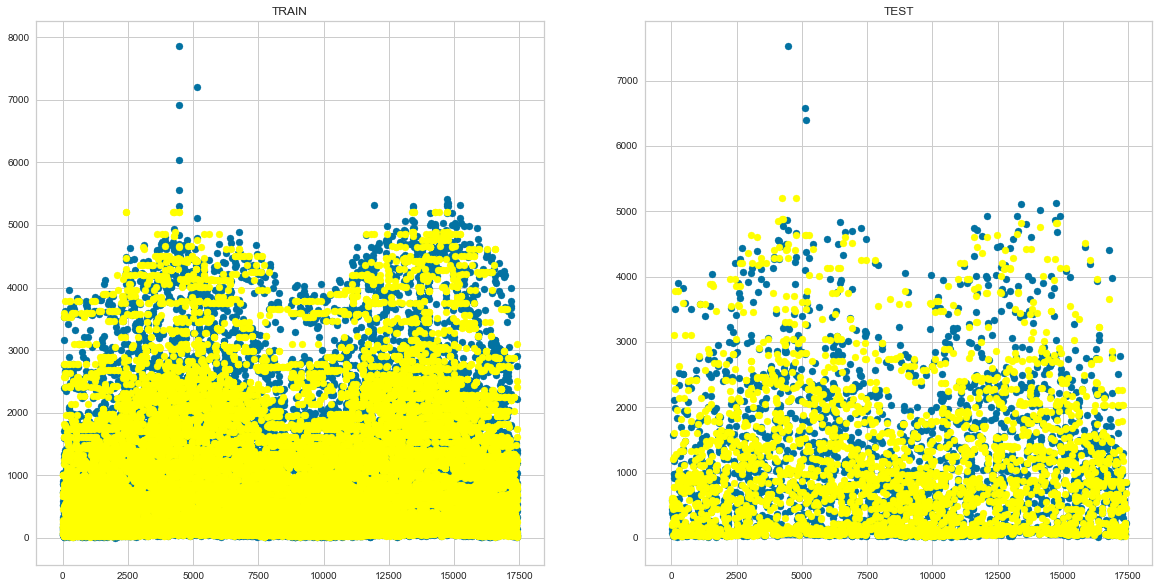

In [84]:
#DT avec methode MSE - par défaut
plt.figure(1,figsize=(20,10))
plt.subplot(1,2,1, title=('TRAIN'))
plt.scatter(y_train.index,y_train)
plt.scatter(y_train.index,dt.predict(X_train), color='yellow')
plt.subplot(1,2,2, title=('TEST'))
plt.scatter(y_test.index,y_test)
plt.scatter(y_test.index,dt.predict(X_test), color='yellow')

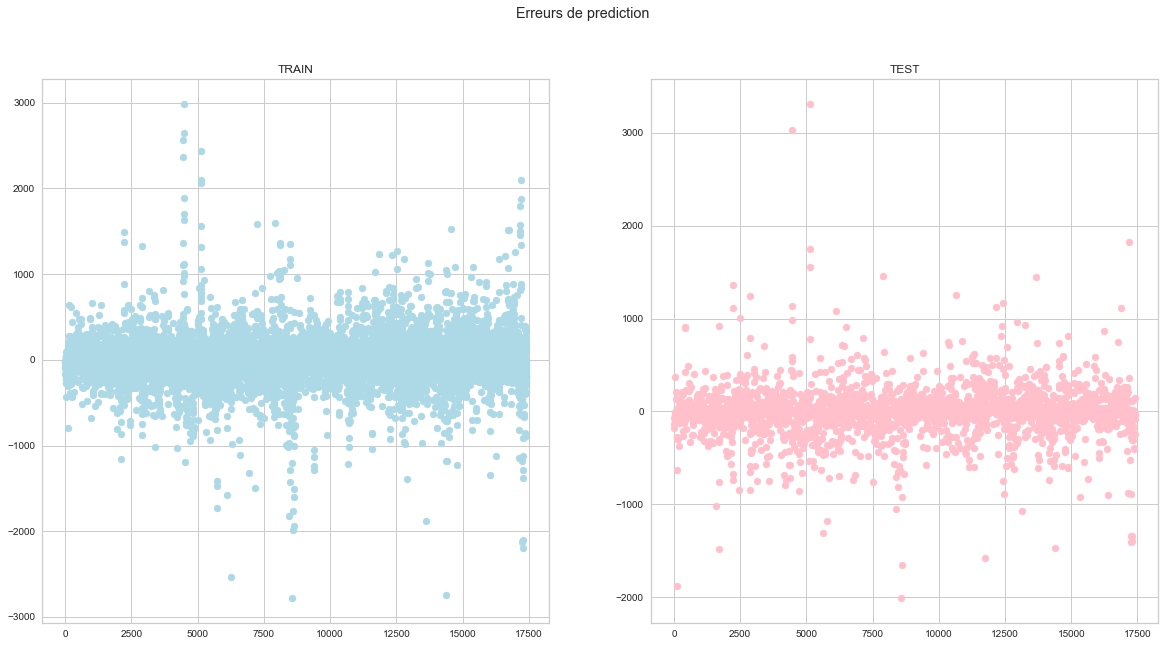

In [85]:
plt.figure(1,figsize=(20,10))
plt.suptitle('Dispersion des erreurs de prediction: obs-est')
plt.subplot(1,2,1, title=('TRAIN'))
plt.scatter(y_train.index,y_train-dt.predict(X_train),color='lightblue')
plt.subplot(1,2,2, title=('TEST'))
plt.scatter(y_test.index,y_test-dt.predict(X_test), color='pink')

In [86]:
## RANDOM FOREST ##
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm
for i in tqdm(range(1, 50)):
    rf = RandomForestRegressor(100, criterion='mse',min_samples_leaf=10).fit(X_train, y_train)

100%|██████████| 49/49 [02:51<00:00,  3.50s/it]


In [87]:
y_pred = rf.predict(X_test)
y_pred

array([  64.48333393, 1926.69805326,  244.39576344, ...,  686.59533281,
        129.46387373,  739.26266702])

In [88]:
from sklearn import metrics

print('Mean Absolute Error Train , Test:',[mean_absolute_error(y_train, rf.predict(X_train)),mean_absolute_error(y_test, rf.predict(X_test))]
)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error Train , Test: [120.91722025505656, 141.87038923859222]
Mean Squared Error: 66831.64014492348
Root Mean Squared Error: 258.51816211810626
R^2 Score: 0.9442288656426681


In [89]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

NameError: name 'errors' is not defined

In [90]:
[r2_score(y_train, rf.predict(X_train)),r2_score(y_test, rf.predict(X_test))]

[0.9568170012883749, 0.9442288656426681]

In [91]:
def rf_feat_importance(rf, df):
    return pandas.DataFrame({'cols':df.columns, 'imp':rf.feature_importances_}
                       ).sort_values('imp', ascending=False)
fi = rf_feat_importance(rf, X_test);
fi

,cols,imp
11,hour_cat,0.453566
9,hour,0.281754
8,weekofday,0.054309
1,t2,0.046115
6,is_weekend,0.045146
0,t1,0.045055
2,hum,0.031460
4,weather_code,0.015266
5,is_holiday,0.010120
7,season,0.007395


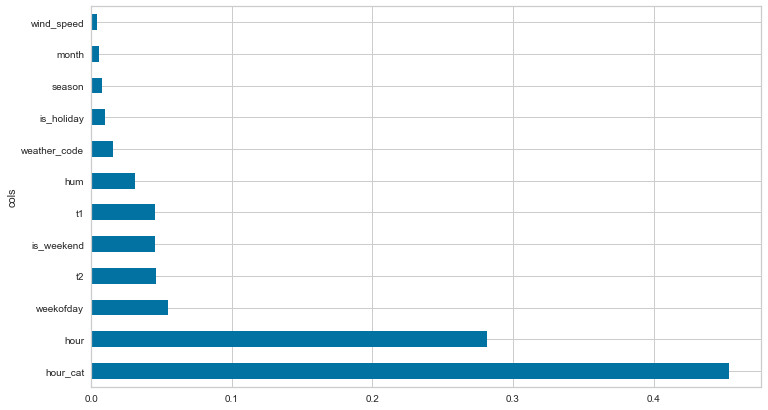

In [92]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
plot_fi(fi);

/Users/Fidji/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


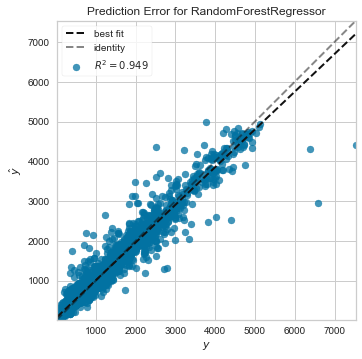

In [93]:
model = RandomForestRegressor()
visualizer = prediction_error(model, X_train, y_train, X_test, y_test)

In [94]:
res = []
for i in tqdm(range(1, 50)):
    dt = DecisionTreeRegressor(min_samples_leaf=i)
    reg = LinearRegression()
    rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=i)
    dt.fit(X_train, y_train)
    reg.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    r = {
        'minl': i,
        'r2_train_dt': r2_score(y_train, dt.predict(X_train)),
        'r2_test_dt': r2_score(y_test, dt.predict(X_test)),
        'r2_train_reg': r2_score(y_train, reg.predict(X_train)),
        'r2_test_reg': r2_score(y_test, reg.predict(X_test)),
        'r2_train_rf': r2_score(y_train, rf.predict(X_train)),
        'r2_test_rf': r2_score(y_test, rf.predict(X_test)),
    }
    res.append(r)
df = pandas.DataFrame(res)
df.head(2)

100%|██████████| 49/49 [03:00<00:00,  3.68s/it]


,minl,r2_train_dt,r2_test_dt,r2_train_reg,r2_test_reg,r2_train_rf,r2_test_rf
0,1,0.999986,0.918906,0.481259,0.471508,0.993509,0.954747
1,2,0.990453,0.927912,0.481259,0.471508,0.987144,0.954654


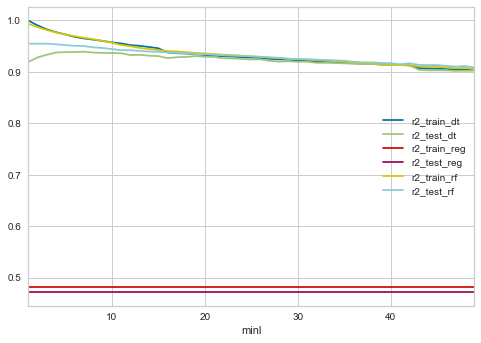

In [95]:
#Plot de classement du R^2
df.plot(x="minl", y=["r2_train_dt", "r2_test_dt",
                     "r2_train_reg", "r2_test_reg",
                    "r2_train_rf", "r2_test_rf"]);
#plafonnement à 0.9

In [96]:
#CROSS VALIDATION RF

from sklearn.model_selection import cross_val_score
cross_val_score(rf, X, y, cv=5)

# cv=5 : 5-Folds cross-validator >> séparation de la BDD en 5 segments.
# Provides train/test indices to split data in train/test sets. No shuffling by default
# Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

array([0.91504012, 0.87957152, 0.80457317, 0.87661422, 0.87398374])

In [97]:
# On demande les Score de R^2 (test r2), de MSE (e2) pour chaque segment
# On observe des R^2 à peu près les mêmes pour la base 1,2,4,5 et 3 a uun R^2 de 0.82. 
# relancer le code de la cross validation au dessus et vérifier que les R^2 demeurent à peu près les mêmes

# Ca nous confirme une certaine stabilité du modèle car les R^2 ressemblent beaucoup à celui de l'arbre de décision et de la RF

from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn.model_selection import cross_validate
cross_validate(rf, X, y, cv=5, scoring=dict(r2=make_scorer(r2_score), e2=make_scorer(mean_squared_error)))

{'fit_time': array([2.37372994, 2.30600977, 2.245646  , 2.47111416, 2.2590332 ]),
 'score_time': array([0.05507612, 0.0584662 , 0.06198406, 0.09632707, 0.08059382]),
 'test_r2': array([0.91456591, 0.88243593, 0.80762567, 0.87390416, 0.87300503]),
 'test_e2': array([ 77771.67382417, 169576.91655172, 139485.90184988, 171960.05694091,
        161733.52871021])}

In [98]:
# Avec option ShuffleSplit 
# R^2 à peu près pareils et à peu près comme RF avec le split train/test

from sklearn.model_selection import ShuffleSplit
res = cross_validate(rf, X, y, cv=ShuffleSplit(5), scoring=dict(r2=make_scorer(r2_score), e2=make_scorer(mean_squared_error)),
              return_train_score=False)
res


{'fit_time': array([2.64740396, 2.49325967, 2.75423503, 2.74535322, 2.67674589]),
 'score_time': array([0.04624701, 0.05490613, 0.04613781, 0.04630089, 0.05899096]),
 'test_r2': array([0.9013494 , 0.90013859, 0.91325585, 0.87683341, 0.91679694]),
 'test_e2': array([117840.05817311, 116142.35523789, 102191.61232129, 149415.85286897,
         96519.63569144])}

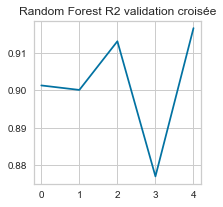

In [99]:
# PLot des différents R^2 selon la segmentation 

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.plot(res['test_r2'])
ax.set_title('Random Forest R2 validation croisée');